# Housing : Price Prediction

Problem Statement:
    
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:

    • Which variables are important to predict the price of variable?

    • How do these variables describe the price of the house?

Business Goal:
    
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\poovi\Downloads\Project-Housing--2---1-\Project-Housing_splitted\train.csv")

In [3]:
#to display all rows and columns

pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [4]:
df.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   127         120       RL          NaN     4928   Pave   NaN      IR1   
1   889          20       RL         95.0    15865   Pave   NaN      IR1   
2   793          60       RL         92.0     9920   Pave   NaN      IR1   
3   110          20       RL        105.0    11751   Pave   NaN      IR1   
4   422          20       RL          NaN    16635   Pave   NaN      IR1   
5  1197          60       RL         58.0    14054   Pave   NaN      IR1   
6   561          20       RL          NaN    11341   Pave   NaN      IR1   
7  1041          20       RL         88.0    13125   Pave   NaN      Reg   
8   503          20       RL         70.0     9170   Pave   NaN      Reg   
9   576          50       RL         80.0     8480   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
5         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
6         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
7         Lvl    AllPub    Corner       Gtl       Sawyer       Norm   
8         Lvl    AllPub    Corner       Gtl      Edwards      Feedr   
9         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   
5       Norm     1Fam     2Story            7            5       2006   
6       Norm     1Fam     1Story            5            6       1957   
7       Norm     1Fam     1Story            5            4       1957   
8       Norm     1Fam     1Story            5            7       1965   
9       Norm     1Fam     1.5Fin            5            5       1947   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   
5          2006     Gable  CompShg     VinylSd     VinylSd       None   
6          1996       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
7          2000     Gable  CompShg     Wd Sdng     Wd Sdng     BrkCmn   
8          1965       Hip  CompShg     MetalSd     MetalSd       None   
9          1950     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   
5         0.0        Gd        TA      PConc       Gd       TA           Av   
6       180.0        TA        TA     CBlock       Gd       TA           No   
7        67.0        TA        TA     CBlock       TA       TA           No   
8         0.0        TA        TA     CBlock       TA       TA     

# EDA:

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df.shape

(1168, 81)

we have 1168 rows and 81 columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In this dataset we have int,float,object datatypes

In [8]:
collist = df.columns.values

for i in collist:
    print(f"unique value of {i} is {df[i].unique()}\n")

unique value of Id is [127 889 793 ... 196  31 617]

unique value of MSSubClass is [120  20  60  50  70  30 160  85  45  90  40  80 190  75 180]

unique value of MSZoning is ['RL' 'RM' 'FV' 'RH' 'C (all)']

unique value of LotFrontage is [ nan  95.  92. 105.  58.  88.  70.  80.  50.  44. 129.  59.  55.  64.
  24.  68.  71.  74.  61.  60. 120.  84. 141.  30.  65.  76. 100.  85.
  75. 107. 122.  82.  62.  73.  79.  77.  41.  69.  90.  96.  72.  34.
  78.  63.  40.  98. 160. 108. 128.  51.  81.  99.  66.  37. 174.  87.
  53. 152.  47.  86.  56.  89.  35.  52.  21. 104.  57.  83.  46. 101.
 112. 149.  93.  49.  43. 130.  54.  91.  67.  97. 110. 103. 115.  94.
  48.  36. 313. 109. 144. 121. 102. 116. 182.  32.  42. 168. 118.  38.
 140. 134. 114. 124.  39. 111.  45. 106. 153.]

unique value of LotArea is [  4928  15865   9920  11751  16635  14054  11341  13125   9170   8480
   8600   9548   9196   8892  16466  10592   5890   7314   7917   2016
  12435   8445   9717  10659   9230  21000  2533

Now lets check for 'nan' values

'Id' can br dropped as it has all unique values and 'Utilities' can be dropped as it has all same values.

In [9]:
df = df.drop(['Id','Utilities'],axis=1)

In [10]:
df.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBa

'Alley', 'PoolQC', 'MiscFeature','Fence' has more than 85% NaN values. So we can drop these columns.

In [11]:
df = df.drop(['Alley','PoolQC','MiscFeature','Fence'],axis=1)

In [12]:
df.shape

(1168, 75)

In [13]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         7
MasVnrArea         7
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinSF1         0
BsmtFinType2      31
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath     

In [14]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object
Electrical        object


In [15]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mode()[0])
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [16]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

Now we have replaced all null values with its mean() and mode() values.

# Feature-extraction:

In [17]:
# Converting years column to age column
df['Year_SinceBuilt'] = df['YearBuilt'].max() - df['YearBuilt']
df['Year_SinceRemodAdded'] = df['YearRemodAdd'].max() - df['YearRemodAdd']
df['Year_SinceSold'] = df['YrSold'].max() - df['YrSold']
df['GarageAge'] = df['GarageYrBlt'].max() - df['GarageYrBlt']

In [18]:
# to Drop old columns 
df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [19]:
col = df.columns
num_col = df._get_numeric_data().columns
cat_col = list(set(col) - set(num_col))
cat_col

['Condition1',
 'BsmtQual',
 'Electrical',
 'MasVnrType',
 'PavedDrive',
 'GarageType',
 'RoofStyle',
 'SaleType',
 'LandSlope',
 'Functional',
 'LotConfig',
 'Foundation',
 'BsmtExposure',
 'BsmtCond',
 'Condition2',
 'BldgType',
 'GarageCond',
 'BsmtFinType2',
 'MSZoning',
 'Heating',
 'Exterior2nd',
 'FireplaceQu',
 'ExterQual',
 'BsmtFinType1',
 'LotShape',
 'HeatingQC',
 'Exterior1st',
 'Street',
 'GarageFinish',
 'KitchenQual',
 'RoofMatl',
 'Neighborhood',
 'GarageQual',
 'CentralAir',
 'HouseStyle',
 'ExterCond',
 'SaleCondition',
 'LandContour']

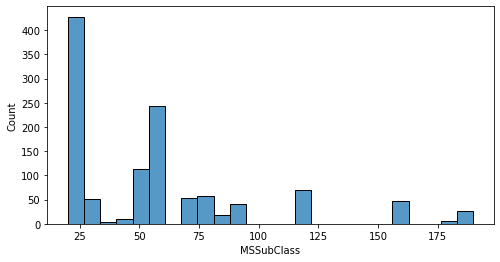

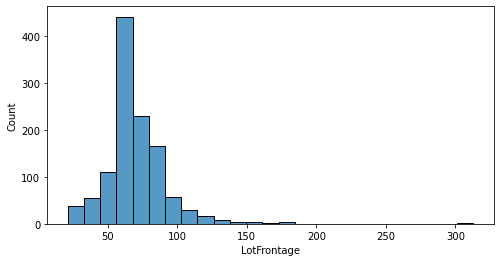

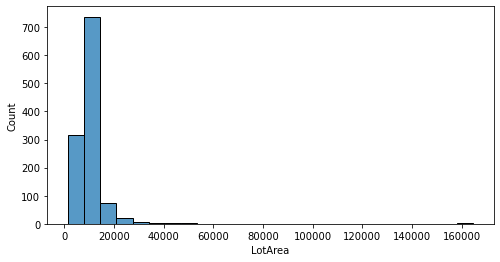

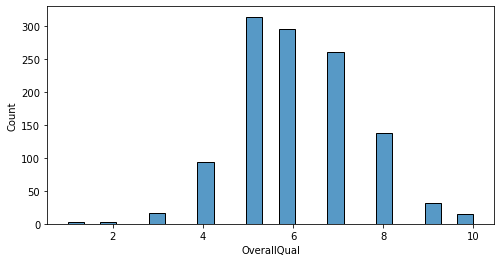

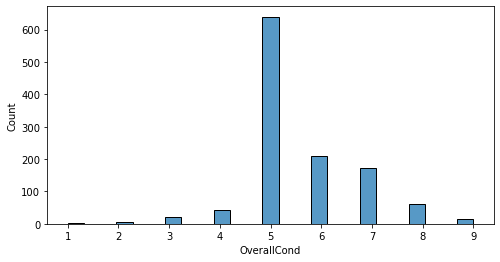

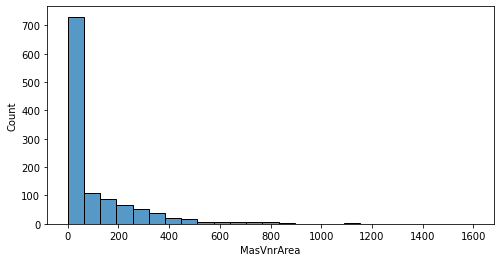

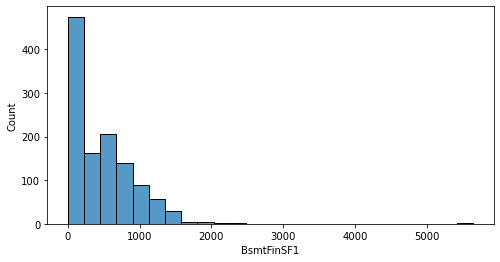

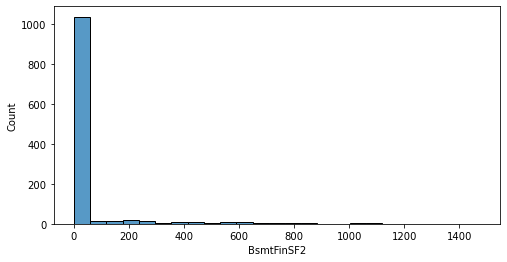

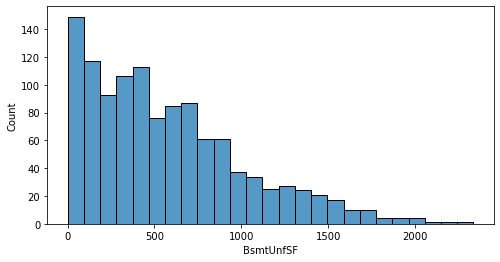

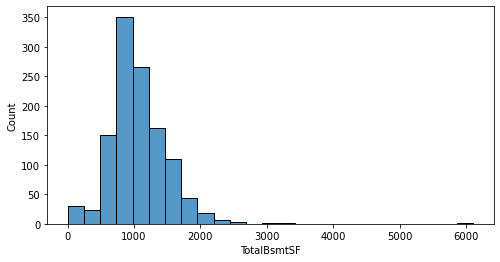

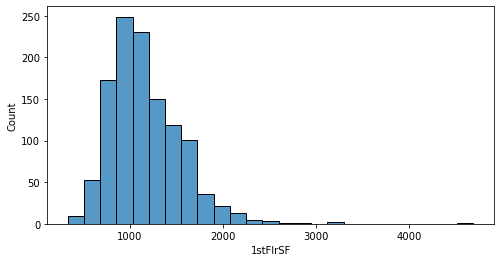

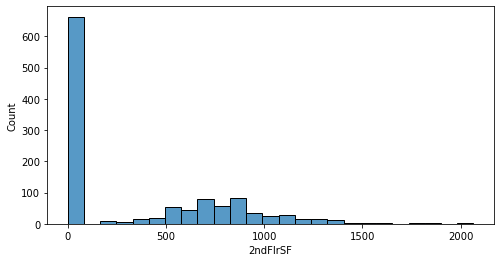

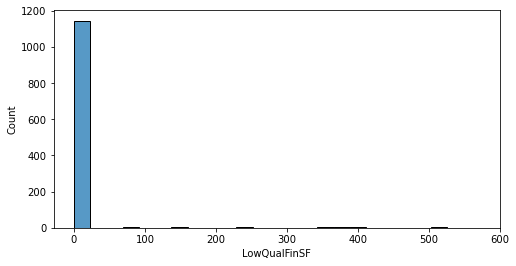

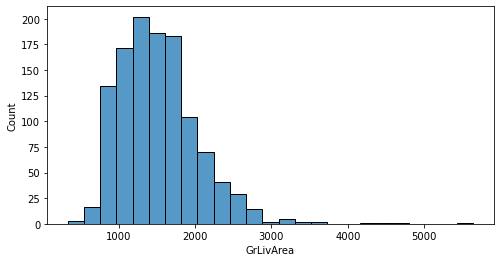

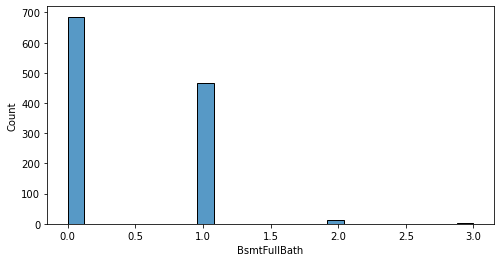

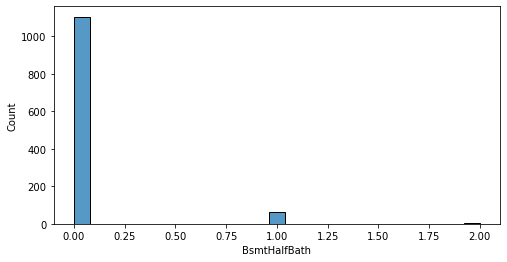

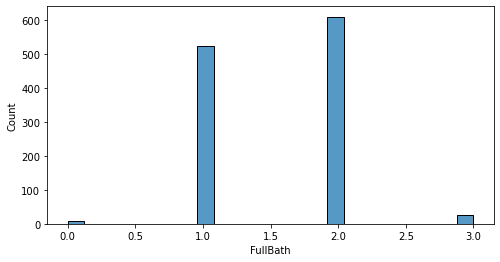

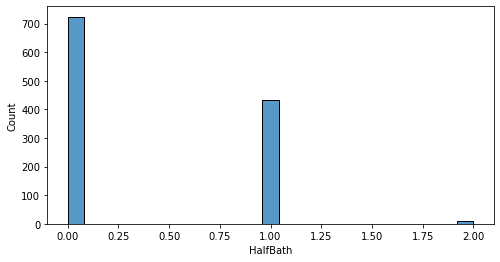

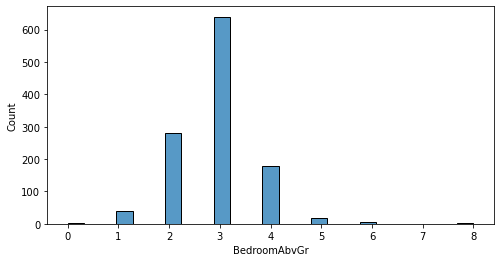

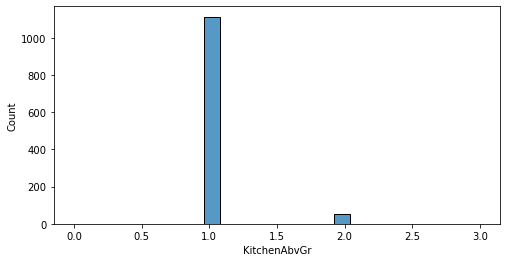

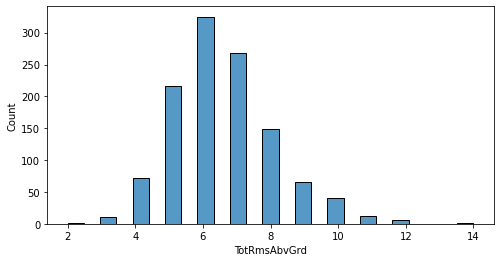

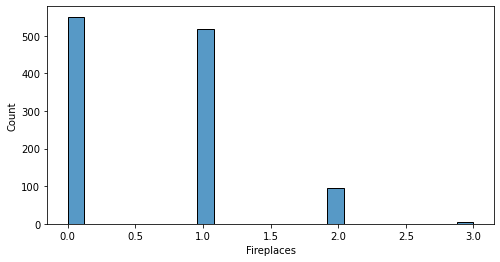

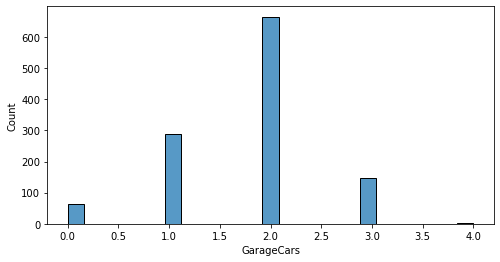

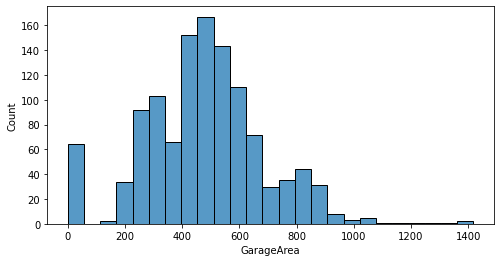

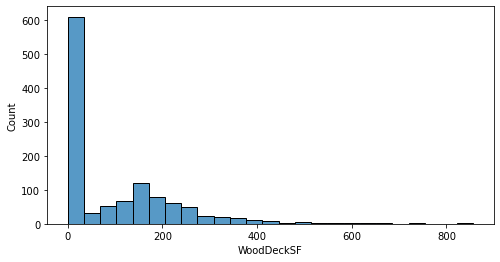

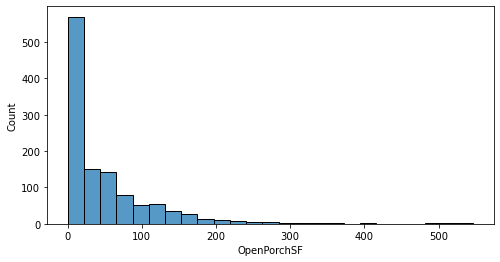

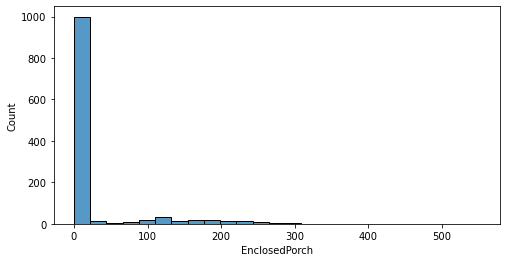

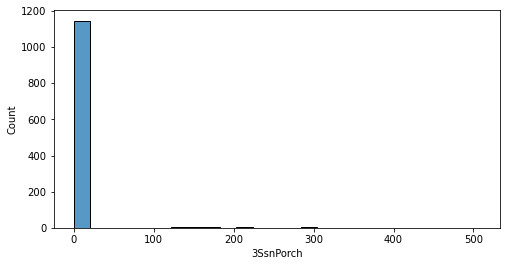

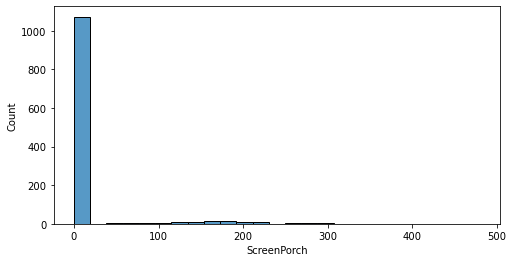

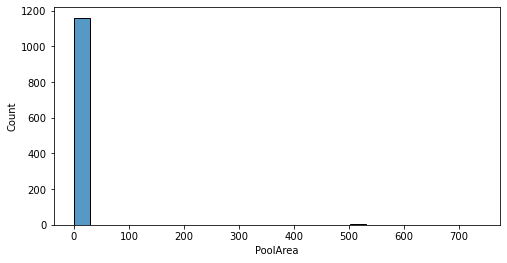

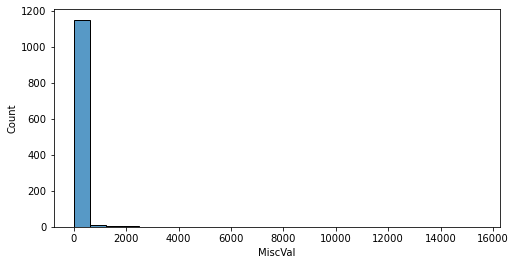

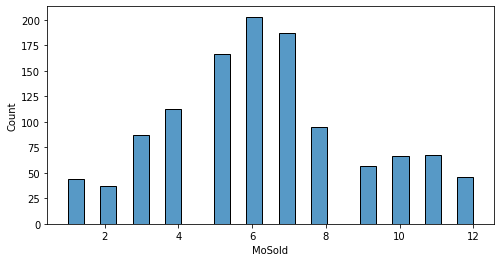

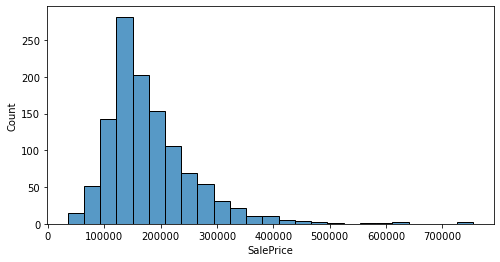

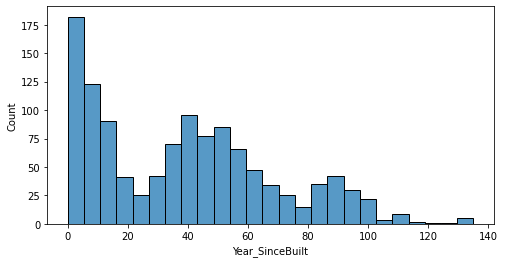

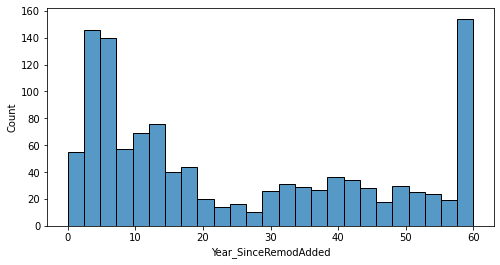

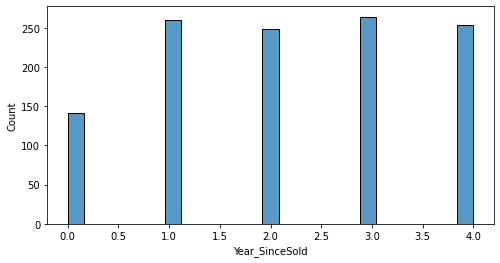

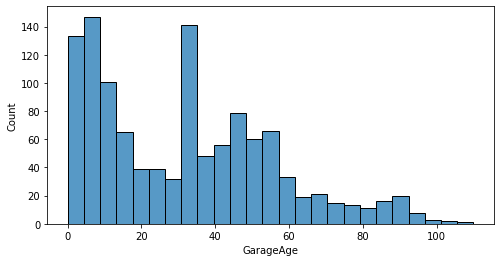

In [20]:
#visualizing numeric columns

for i in num_col:
    plt.figure(figsize=(8,4))
    sns.histplot(df[i],bins=25)
    title=i
    plt.plot()
    

Key Observations:

1. As MSSubClass is increasing, sales is decreasing. And it is seen between 25-75 there are more number of sales.
2. As LotFrontage increases, sales decreases. And more sales is between 25 and 100
3. As LotArea increases, sales decreases.
4. OverallQual is more between 4 and 8.
5. OverallCond is more at 5 and then sales decreases. Sales deponds on condition of the building if it is good sales increases otherwise it decreases.
6. AS MasVnrArea increases, sales decreases.
7. AS BsmtFinSF1 increases, sales decreases.
8. As BsmtFinSF2 increases, sales decreases. 
9. As BsmtUnfSF increases, sales decreases gradually.
10. As TotalBsmtSF increases, sales decreases.
11. As 1stFlrSF increases, sales decreases.
12. Sales is more at 2ndFlrSF at 0-50. Then it gradually decreases.
13. GrLivArea increases, sales decreases.
14. HalfBath,Kitchen may prefers 1 room. As size increases sales decreases.
15. GarageCar mostly prefered onr is 2 car parking.
16. Mostly prefered GarageAre is between 400 and 800. As area increases sales decreases.
17. As OpenPorchSf increases, sales decreases.
18. Many Prefer ClosedPorch.
19. As age of building increases, sales decreases. Most of them prefer newly constructed building
20. Sales price ranges from 1.5-2lakhs in most cases. And there are even people who prefers upto 7 lakhs but number of count who prefer is less.




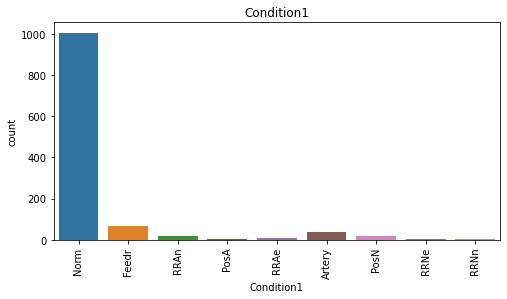

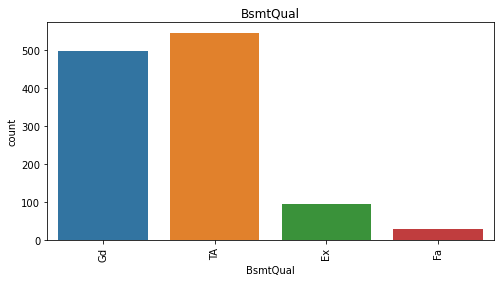

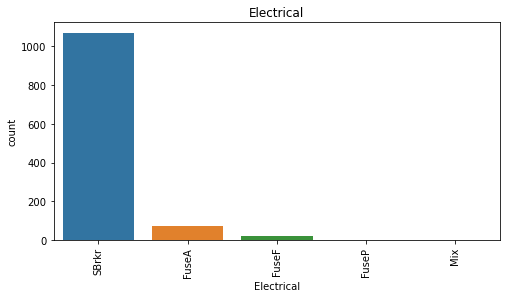

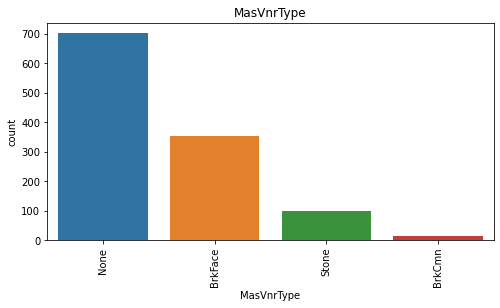

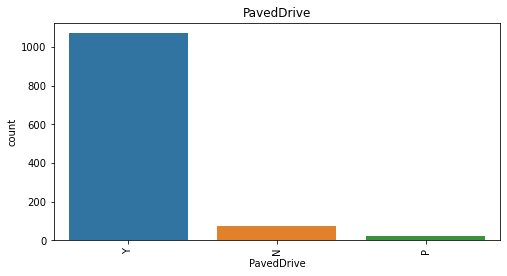

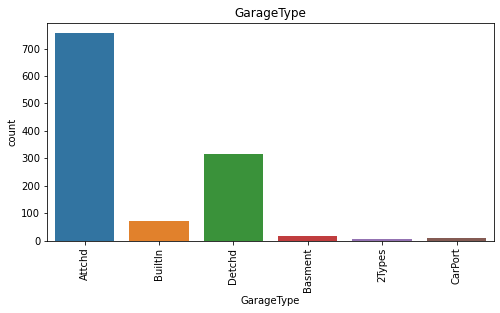

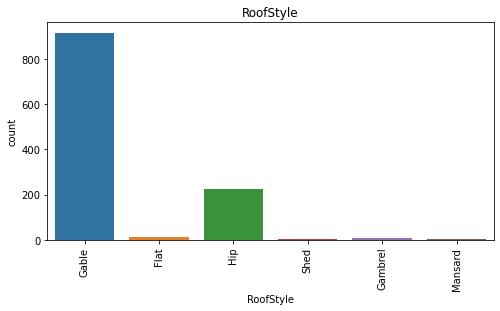

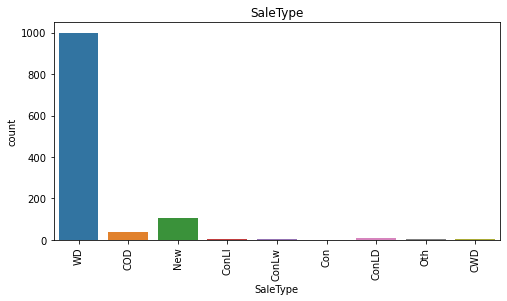

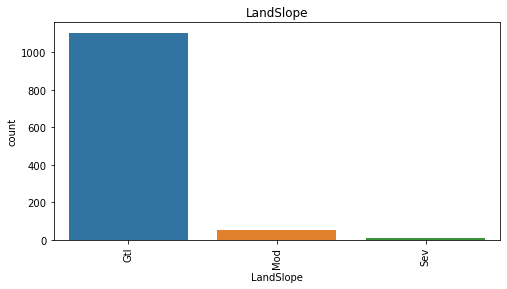

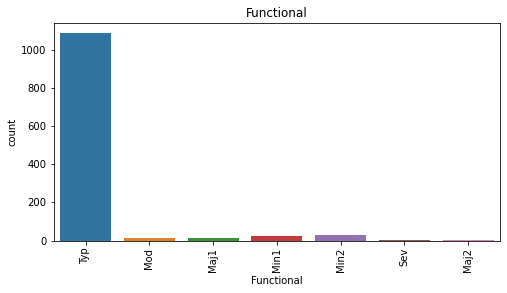

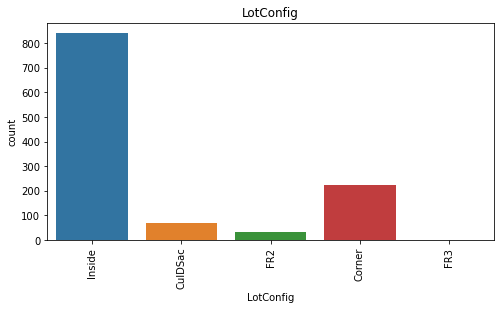

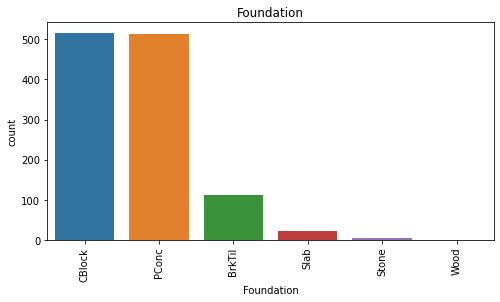

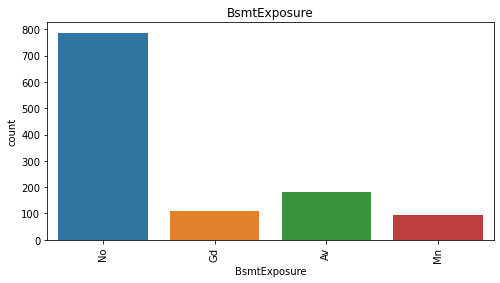

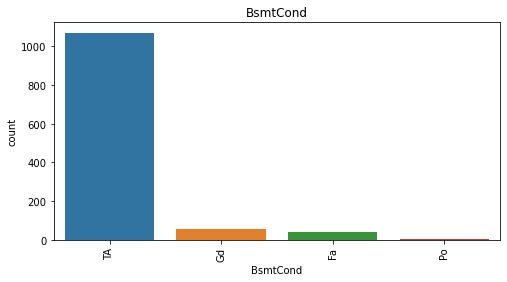

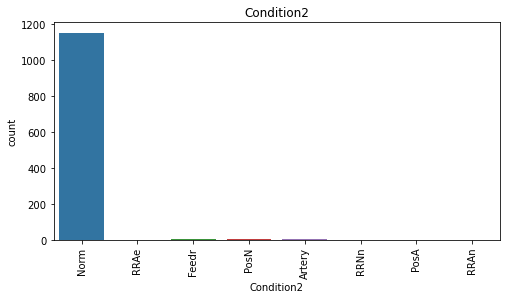

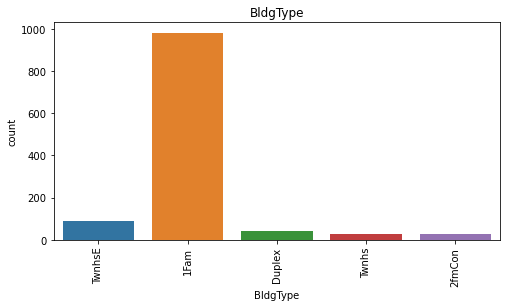

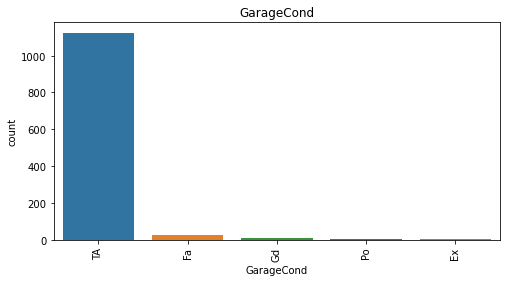

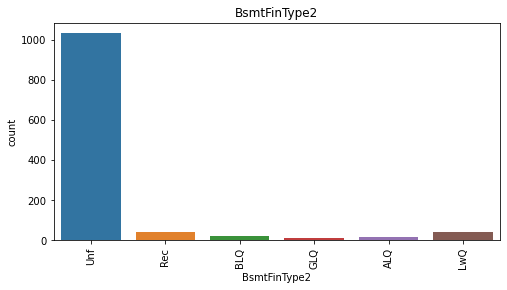

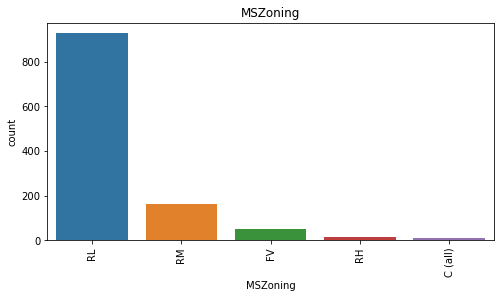

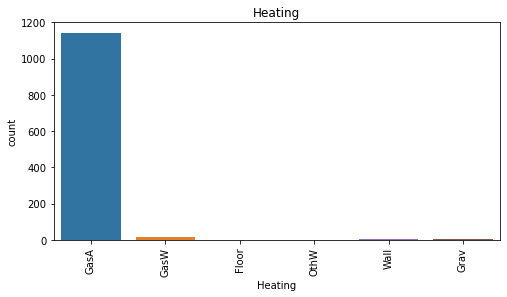

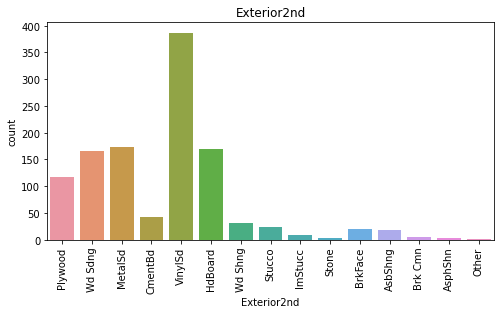

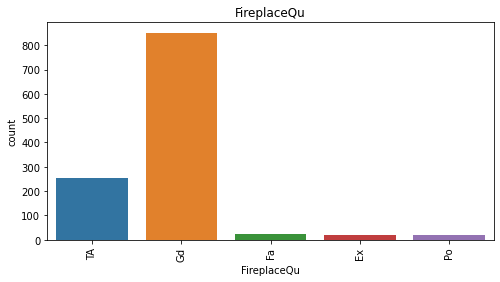

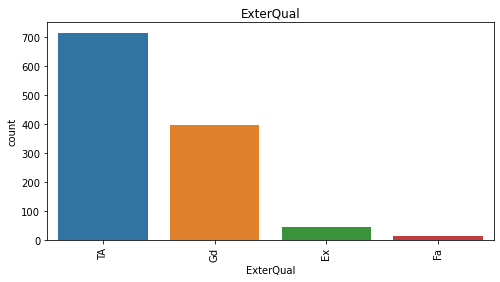

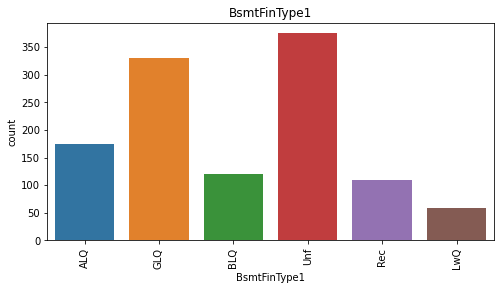

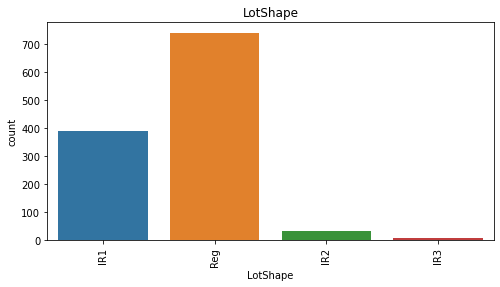

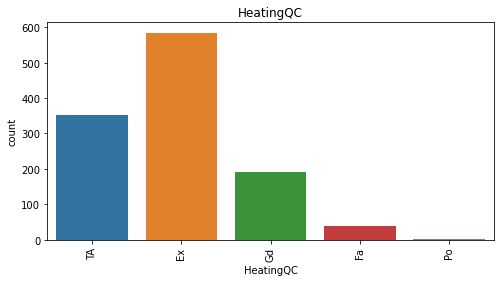

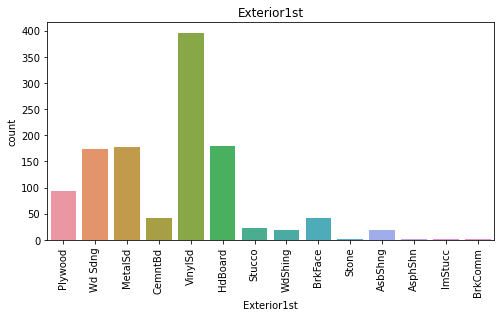

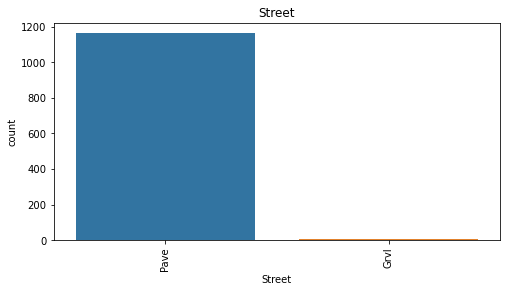

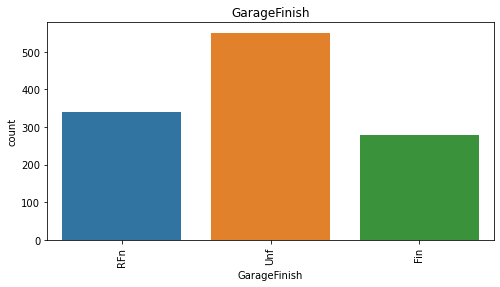

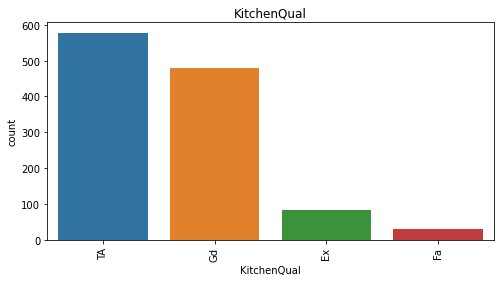

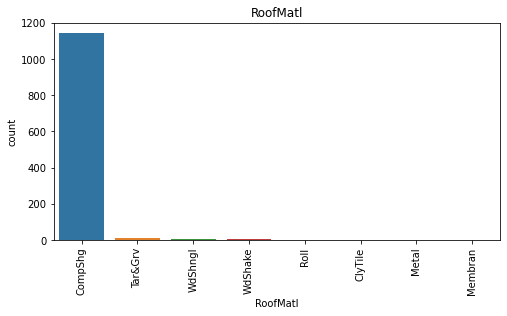

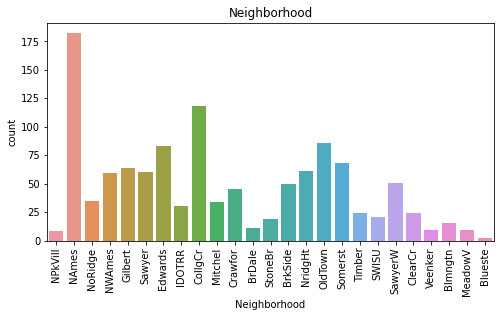

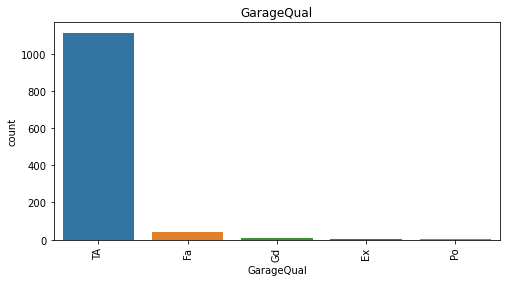

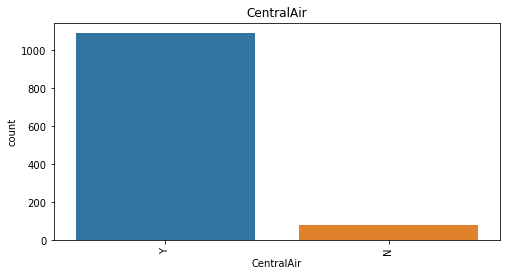

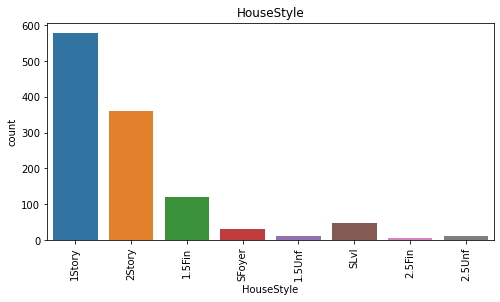

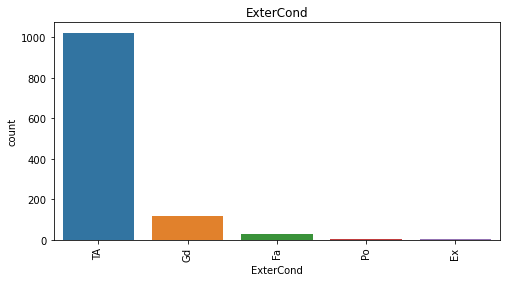

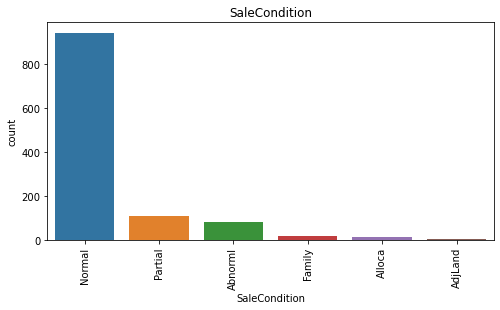

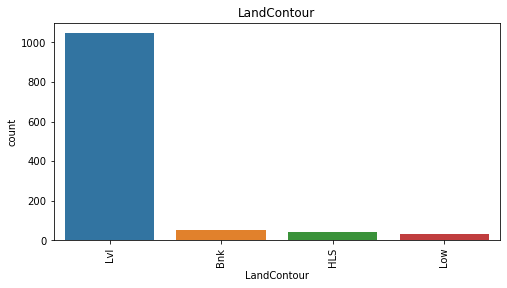

In [21]:
#Visualization of Categorical columns

for i in cat_col:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df,x=df[i])
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

Key Observation:

1. Evaluates the quality of material on the exterior TA(average/Typical) has more sales followed by gd(Good)
2. Proximity to various conditions(if more than one is present) Norm(Normal) sales is more.
3. Many prefered Vinyl Sliding(VinylSd) followed by Hard Board(HDBoard),Metal Sliding(MetalSd), WoodSliding(Wd Sliding)
4. Garage Location - Attached to Home(Attchd) sees high sales followed by Detached from home(Detchd).
5. BsmtExposure(Walkout or Garden level walls) many sales is done with No Basement followed by Av(Average Exposure).
6. Functional: Many sales is done for Typical Funcionality(Typ).
7. More sales is done in North Ames(NAmes) followed by College Creek(CollgCr) which sees high sales. and lowest sales is seen in Bluestem(Bluestem).
8. In Rating of basement finished area(BsmtFinType2) many sales donw eith Unf(Unfinished), followed by LwQ(Low Quality)
9. Many sales done foe TA(Typical/Average) Garage Condition.
10. Many sales is seen with Unf(Unfinished) GarageFinish.
11. Sales Type is high in WD(Warranty Deed) followed by New(Home just constructed and sold).
12. LotShape(General Shape of Propert)- Reg(Regular) has seen more sales.
13. LandSlope(Slope of Property) -Gtl(Gentle Slope) has seen high sales.
14. Many sales are done with CentralAir conditioning.
15. Lvl(Near Flat/Level) has seen more slaes in LandContour(Flatness of Property)
16. MasVnrType(Masonry veneer type)- None has seen more slaes followed by BrkFace(Brick Face).
17. Foundation(Type of foundation) - CBlock(Cinder Block) has more sales followed by PConc(Poured Contrete)
18. BldgType(Type of Dwelling)- 1Fam(Single Family detached) has more sales, followed by TwnhsE(Townhouse End Unit)
19. MSZoning(General zoning classification)- more sales is done with RL(Residential Low Density) followed by RM(Residential Medium Density).
20. Electrical(Electrical System)- Many slaes is done for SBkr(Standard Circuit Breakers & Romex).
21. SaleCondition - Mostly Normal Sale is done followed by Partial.
22. Mostly 1Storey has ssen high sales followed by 2Storey in HouseStyle.
23. GasA(Gas forces warm air furnace) with excellent quality is prefered in Heating Type which has seen large number of slaes.
24. RoofStyle and Material most sales happed with CompShg(Standard(composite) shingle) with Gable material.
25. Most saled happed with PavedDrive
26. LotConfig(Lot Configuration) Inside lot has seen more sales.
27. Lot of sales is seen in Good Fireplace Quality.
28. More sales is seen with Pave Street than Gravel street.
29. Kitchen, ExternalQual, GarageQual sales is seen high in TA(Average).

# Now lets convert categorical data to numeric using Label Encoder 

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in cat_col:
    df[i] = le.fit_transform(df[i])

# Describe:

In [23]:
df.describe()

MSSubClass     MSZoning  LotFrontage        LotArea       Street  \
count  1168.000000  1168.000000  1168.000000    1168.000000  1168.000000   
mean     56.767979     3.013699    68.975171   10484.749144     0.996575   
std      41.940650     0.633120    22.836520    8957.442311     0.058445   
min      20.000000     0.000000    21.000000    1300.000000     0.000000   
25%      20.000000     3.000000    60.000000    7621.500000     1.000000   
50%      50.000000     3.000000    64.000000    9522.500000     1.000000   
75%      70.000000     3.000000    79.250000   11515.500000     1.000000   
max     190.000000     4.000000   313.000000  164660.000000     1.000000   

          LotShape  LandContour    LotConfig    LandSlope  Neighborhood  \
count  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000   
mean      1.938356     2.773973     3.004281     0.064212     12.145548   
std       1.412262     0.710027     1.642667     0.284088      6.010364   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.000000     3.000000     2.000000     0.000000      7.000000   
50%       3.000000     3.000000     4.000000     0.000000     12.000000   
75%       3.000000     3.000000     4.000000     0.000000     17.000000   
max       3.000000     3.000000     4.000000     2.000000     24.000000   

        Condition1   Condition2     BldgType   HouseStyle  OverallQual  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      2.032534     2.005993     0.476027     3.043664     6.104452   
std       0.871703     0.250035     1.180870     1.898625     1.390153   
min       0.000000     0.000000     0.000000     0.000000     1.000000   
25%       2.000000     2.000000     0.000000     2.000000     5.000000   
50%       2.000000     2.000000     0.000000     2.000000     6.000000   
75%       2.000000     2.000000     0.000000     5.000000     7.000000   
max       8.000000     7.000000     4.000000     7.000000    10.000000   

       OverallCond    RoofStyle     RoofMatl  Exterior1st  Exterior2nd  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      5.595890     1.402397     1.086473     8.659247     9.363014   
std       1.124343     0.832539     0.642848     3.097443     3.462380   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.000000     1.000000     1.000000     7.000000     7.000000   
50%       5.000000     1.000000     1.000000    11.000000    11.000000   
75%       6.000000     1.000000     1.000000    11.000000    12.000000   
max       9.000000     5.000000     7.000000    13.000000    14.000000   

        MasVnrType   MasVnrArea    ExterQual    ExterCond   Foundation  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      1.758562   102.310078     2.530822     3.725171     1.395548   
std       0.611174   182.047152     0.699425     0.744463     0.709379   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000     2.000000     4.000000     1.000000   
50%       2.000000     0.000000     3.000000     4.000000     1.000000   
75%       2.000000   160.000000     3.000000     4.000000     2.000000   
max       3.000000  1600.000000     3.000000     4.000000     5.000000   

          BsmtQual     BsmtCond  BsmtExposure  BsmtFinType1   BsmtFinSF1  \
count  1168.000000  1168.000000   1168.000000   1168.000000  1168.000000   
mean      2.282534     2.802226      2.273116      2.798801   444.726027   
std       0.857830     0.674746      1.144218      1.837839   462.664785   
min       0.000000     0.000000      0.000000      0.000000     0.000000   
25%       2.000000     3.000000      2.000000      1.000000     0.000000   
50%       2.000000     3.000000      3.000000      2.000000   385.500000   
75%       3.000000     3.000000      3.000000      5.000000   714.500000   
max       3.000000     3.000000      3

We can find thant many columns are with outliers and skewness. 

# correlation:

In [24]:
df.corr()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass              1.000000  0.007478    -0.326434 -0.124151 -0.035981   
MSZoning                0.007478  1.000000    -0.066533 -0.023328  0.140215   
LotFrontage            -0.326434 -0.066533     1.000000  0.265609 -0.032807   
LotArea                -0.124151 -0.023328     0.265609  1.000000 -0.263973   
Street                 -0.035981  0.140215    -0.032807 -0.263973  1.000000   
LotShape                0.104485  0.053655    -0.081616 -0.189201 -0.012941   
LandContour            -0.021387  0.001175    -0.075284 -0.159038  0.105226   
LotConfig               0.076880 -0.027246    -0.154986 -0.152063  0.000153   
LandSlope              -0.014930 -0.023952     0.026002  0.395410 -0.141572   
Neighborhood            0.013918 -0.251833     0.067495  0.010707  0.001420   
Condition1             -0.042474 -0.025651    -0.035085  0.029520  0.002189   
Condition2             -0.044319  0.031959     0.002127  0.040096  0.001406   
BldgType                0.731815 -0.024776    -0.389578 -0.215345 -0.013606   
HouseStyle              0.381585 -0.110991     0.044769 -0.040637  0.016793   
OverallQual             0.070462 -0.134037     0.233914  0.107188  0.057140   
OverallCond            -0.056978  0.189553    -0.049850  0.017513  0.031082   
RoofStyle              -0.100641  0.000913     0.147682  0.038615 -0.006875   
RoofMatl               -0.032214  0.009719     0.071825  0.194142  0.007889   
Exterior1st            -0.090178 -0.012037     0.094989  0.048265  0.012482   
Exterior2nd            -0.120022  0.005548     0.114741  0.027328  0.014618   
MasVnrType             -0.013252 -0.033521    -0.013323 -0.005204  0.000822   
MasVnrArea              0.027813 -0.063862     0.187395  0.121086  0.024583   
ExterQual              -0.024133  0.184815    -0.175356 -0.057865  0.044509   
ExterCond               0.004186 -0.099269     0.047229  0.011438  0.017738   
Foundation              0.053951 -0.244844     0.088361 -0.021195  0.032701   
BsmtQual               -0.052242  0.123822    -0.187994 -0.075262 -0.031959   
BsmtCond               -0.013220  0.002336     0.031824  0.010165 -0.017190   
BsmtExposure           -0.068192  0.037414    -0.120126 -0.136900  0.065253   
BsmtFinType1            0.017515  0.021518    -0.010552 -0.053584 -0.006420   
BsmtFinSF1             -0.052236 -0.034161     0.211540  0.221851 -0.009066   
BsmtFinType2            0.040573 -0.031322     0.002258 -0.084713  0.045208   
BsmtFinSF2             -0.062403  0.027055    -0.007767  0.056656  0.003550   
BsmtUnfSF              -0.134170 -0.032638     0.130721  0.006600  0.024205   
TotalBsmtSF            -0.214042 -0.058896     0.351242  0.259733  0.016422   
Heating                 0.047734  0.051188    -0.022478 -0.020394  0.006981   
HeatingQC              -0.001994  0.119852    -0.089188 -0.003337 -0.047968   
CentralAir             -0.113883 -0.015887     0.064013  0.051182  0.043024   
Electrical              0.045533 -0.079205     0.062261  0.050388  0.038720   
1stFlrSF               -0.227927 -0.033095     0.390769  0.312843  0.011486   
2ndFlrSF                0.300366 -0.048968     0.089787  0.059803  0.040957   
LowQualFinSF            0.053737  0.012098     0.013729 -0.001915  0.007352   
GrLivArea               0.086448 -0.064125     0.365560  0.281360  0.043322   
BsmtFullBath            0.004556 -0.007287     0.079011  0.142387 -0.036483   
BsmtHalfBath            0.008207  0.006345     0.001207  0.059282  0.013788   
FullBath                0.140807 -0.188837     0.169795  0.123197  0.033208   
HalfBath                0.168423 -0.121209     0.039778  0.007271  0.045146   
BedroomAbvGr           -0.013283 -0.001906     0.230661  0.117351  0.027587   
KitchenAbvGr            0.283506  0.026744     0.004392 -0.013075  0.012304   
KitchenQual            -0.011378  0.111689    -0.184846 -0.064278 -0.012056   
TotRmsAbvGrd            0.051179 -0.031062     0.315558  0.184546  0.038

<AxesSubplot:>

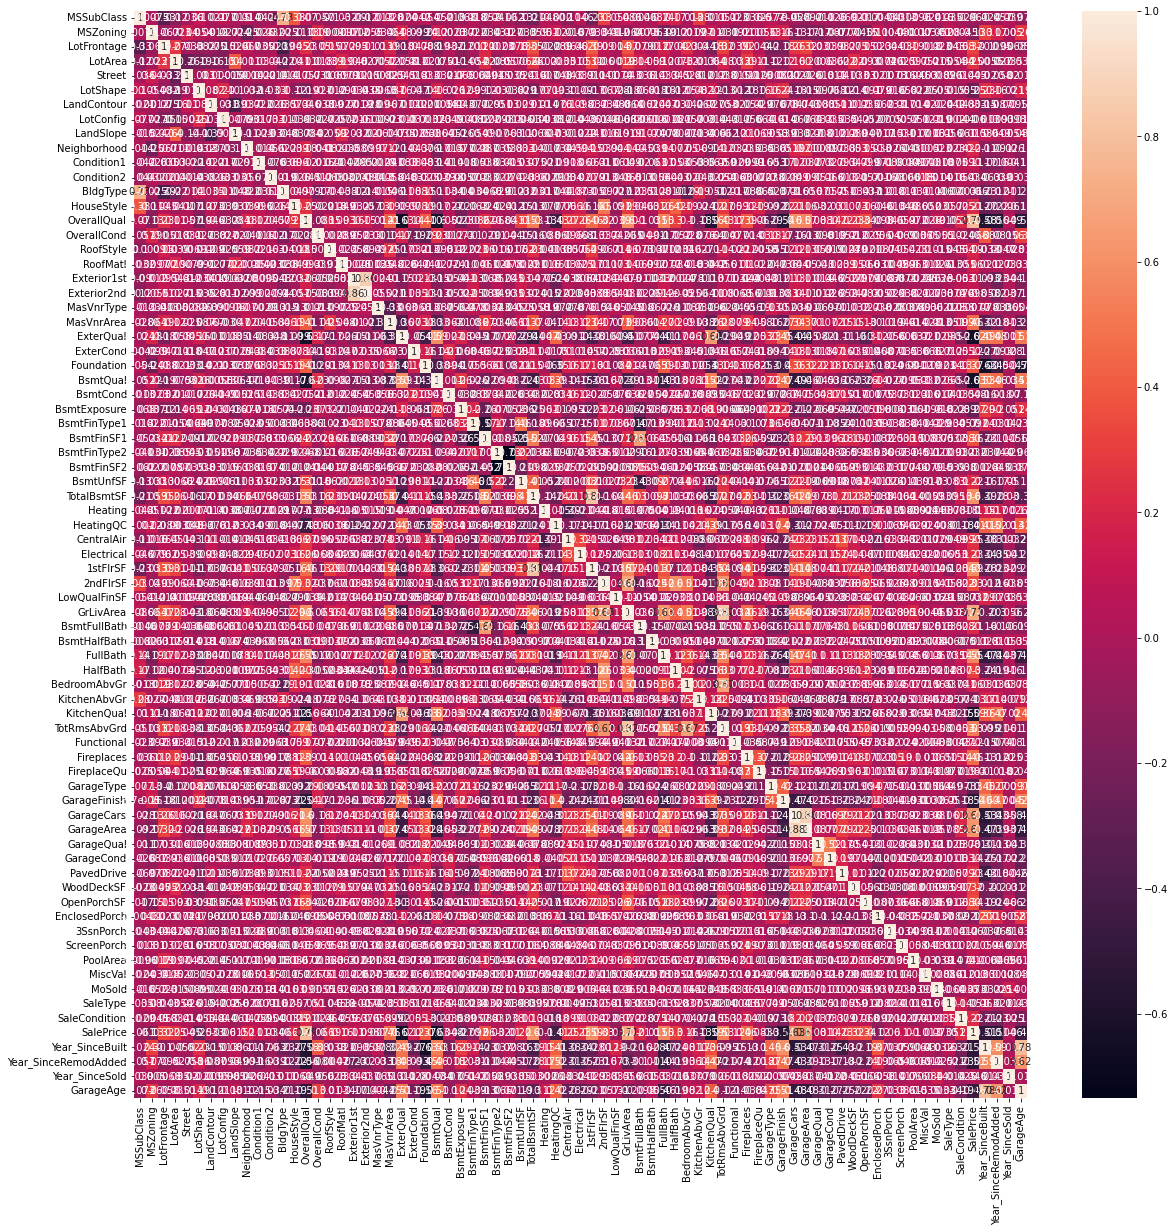

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

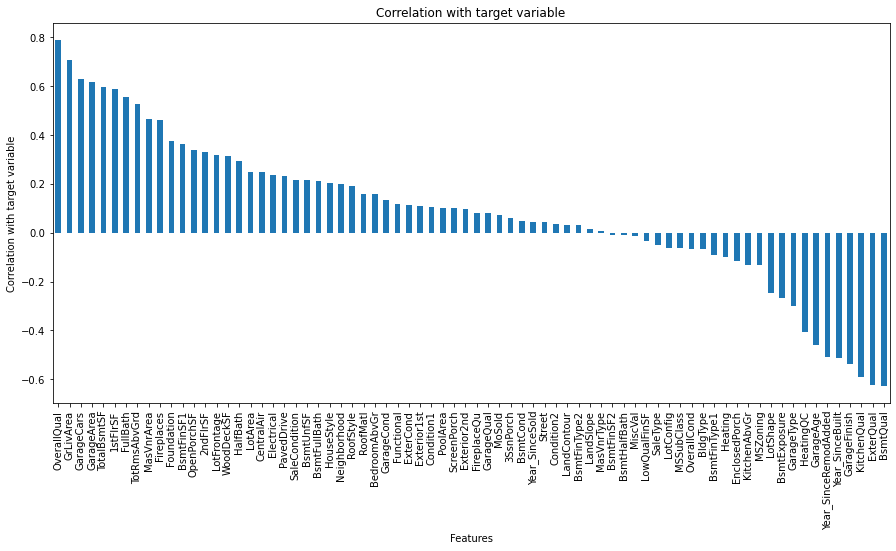

In [26]:
plt.figure(figsize=(15,7))
df.corr()['SalePrice'].sort_values(ascending=False).drop(['SalePrice']).plot.bar()
plt.xlabel("Features")
plt.ylabel("Correlation with target variable")
plt.title("Correlation with target variable")
plt.show()

Key Observations:

1. we can see that 'OverallQual' is highly positively correlated with target variable whereas 'BsmtQual' is negatively correlated with target variable.
2. 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd','MasVnrArea','FirePlaces', 'Foundation', 'BsmtFinSF1', 'OpenPorchSF', '2ndFlrSF', 'LotFontage', 'WoodDeckSF','HalfBath', 'LotArea','CenralAir', 'PavedDrive', 'SaleCondition', 'BsmtUnSF', 'BsmtFullBath','Neighbourhood', 'Housstyle','Roofstyle' 'Condition1' are positively correled with target variable.
3. 'BsmtQual', 'ExterQual', 'KitchenQual', 'GarageFinish','Year_SinceBuilt','Year_sinceremould','GarageAge', 'HeatingQC','GarageType', 'KitchenAbvGr', 'Heating' are negatively correleated with target variable.

# Outliers:

In [27]:
x = df.drop(['SalePrice'],axis=1)
y = df['SalePrice']

In [28]:
x.shape

(1168, 74)

MSSubClass                 AxesSubplot(0.125,0.837584;0.133621x0.0424157)
MSZoning                AxesSubplot(0.285345,0.837584;0.133621x0.0424157)
LotFrontage              AxesSubplot(0.44569,0.837584;0.133621x0.0424157)
LotArea                 AxesSubplot(0.606034,0.837584;0.133621x0.0424157)
Street                  AxesSubplot(0.766379,0.837584;0.133621x0.0424157)
LotShape                   AxesSubplot(0.125,0.786685;0.133621x0.0424157)
LandContour             AxesSubplot(0.285345,0.786685;0.133621x0.0424157)
LotConfig                AxesSubplot(0.44569,0.786685;0.133621x0.0424157)
LandSlope               AxesSubplot(0.606034,0.786685;0.133621x0.0424157)
Neighborhood            AxesSubplot(0.766379,0.786685;0.133621x0.0424157)
Condition1                 AxesSubplot(0.125,0.735787;0.133621x0.0424157)
Condition2              AxesSubplot(0.285345,0.735787;0.133621x0.0424157)
BldgType                 AxesSubplot(0.44569,0.735787;0.133621x0.0424157)
HouseStyle              AxesSubplot(0.

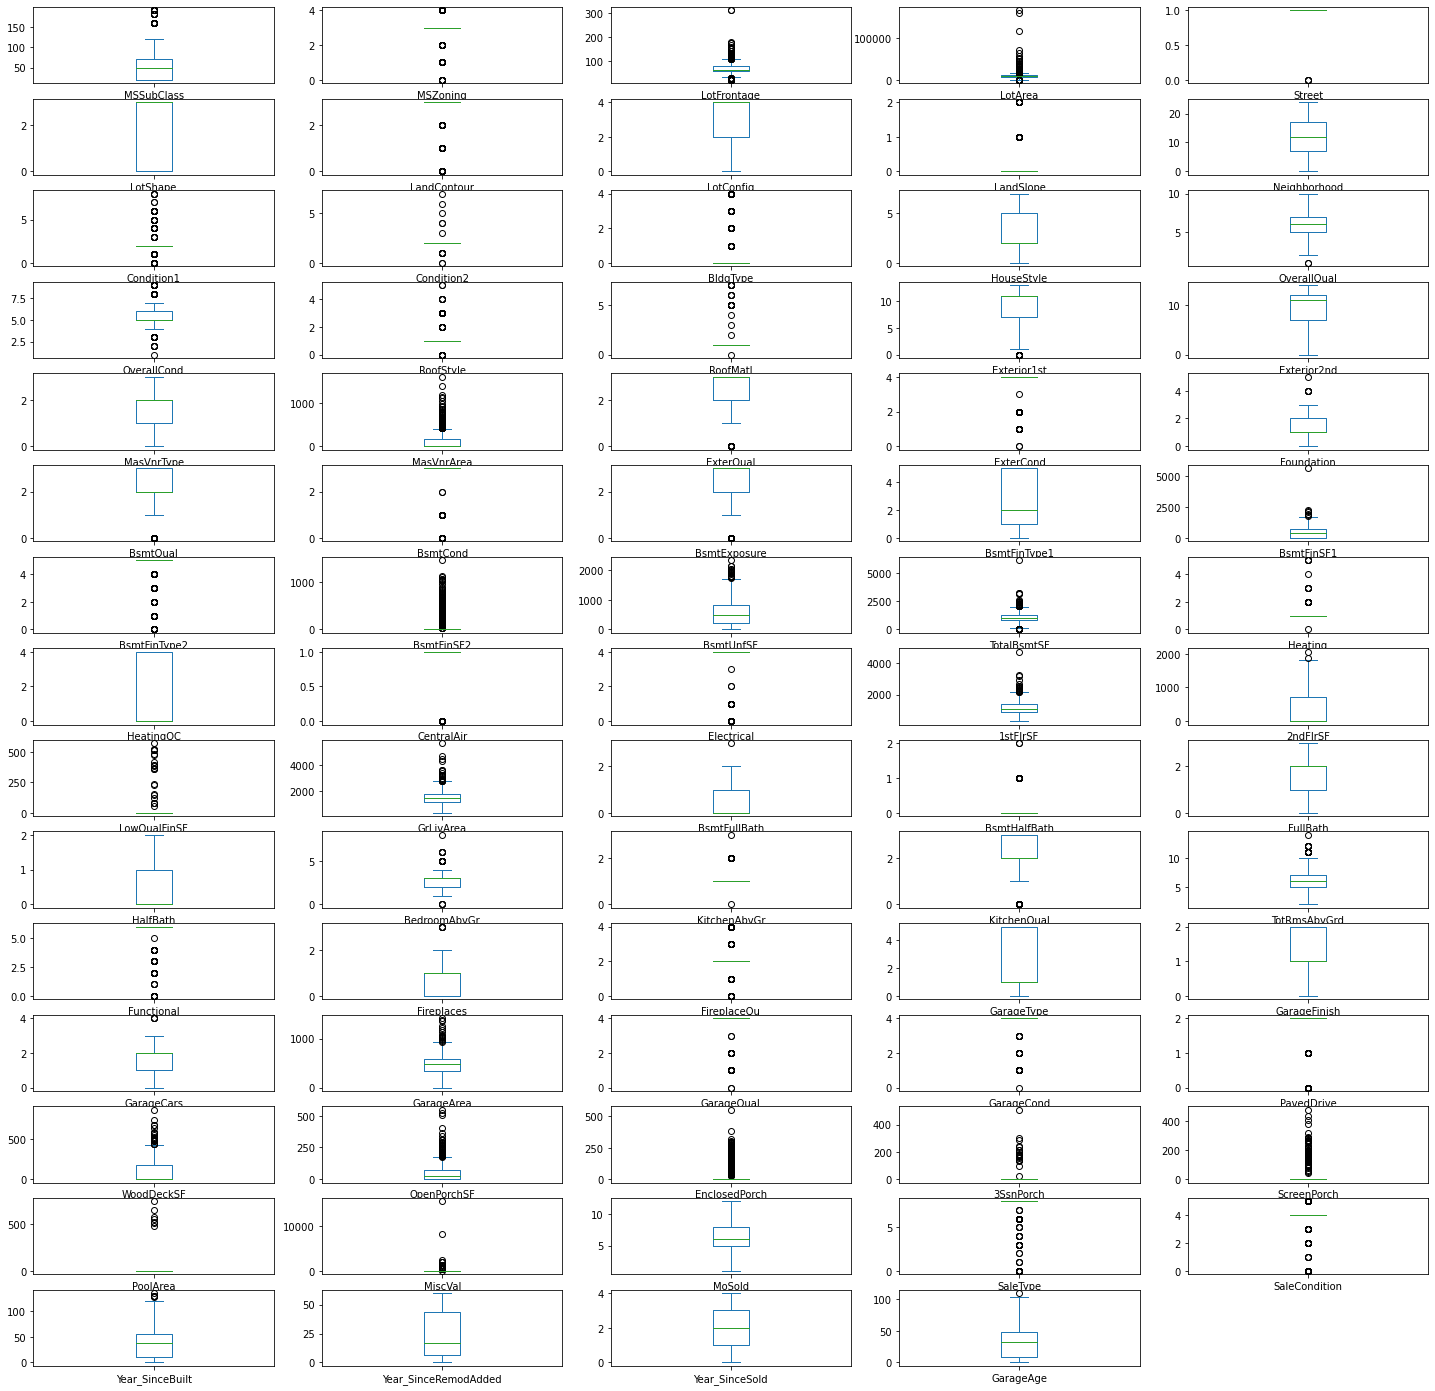

In [29]:
x.plot(kind='box',subplots='True',layout=(15,5),figsize=(25,25))

We can see that outliers are present in almost all columns.

# Removing Outliers:

In [30]:
from scipy.stats import zscore
z = np.abs(zscore(x))
threshold = 3
x_new = x[(z<3).all(axis=1)]

In [31]:
print("Old DataFrame : ",x.shape)
print("New DataFrame : ",x_new.shape)
print("Dropped Rows : ",x.shape[0]-x_new.shape[0])

Old DataFrame :  (1168, 74)
New DataFrame :  (484, 74)
Dropped Rows :  684


In [32]:
percentage_loss = (1168-484)/1168*100
percentage_loss

58.56164383561644

We have large amount of data loss so we need to do further analysis without removing outliers.

# Skewness:

In [33]:
x.skew()

MSSubClass               1.422019
MSZoning                -1.796785
LotFrontage              2.815783
LotArea                 10.659285
Street                 -17.021969
LotShape                -0.603775
LandContour             -3.125982
LotConfig               -1.118821
LandSlope                4.812568
Neighborhood             0.043735
Condition1               3.008289
Condition2              11.514458
BldgType                 2.318657
HouseStyle               0.285680
OverallQual              0.175082
OverallCond              0.580714
RoofStyle                1.498560
RoofMatl                 7.577352
Exterior1st             -0.612816
Exterior2nd             -0.592349
MasVnrType              -0.104609
MasVnrArea               2.834658
ExterQual               -1.810843
ExterCond               -2.516219
Foundation              -0.002761
BsmtQual                -1.343781
BsmtCond                -3.293554
BsmtExposure            -1.166987
BsmtFinType1            -0.068901
BsmtFinSF1    

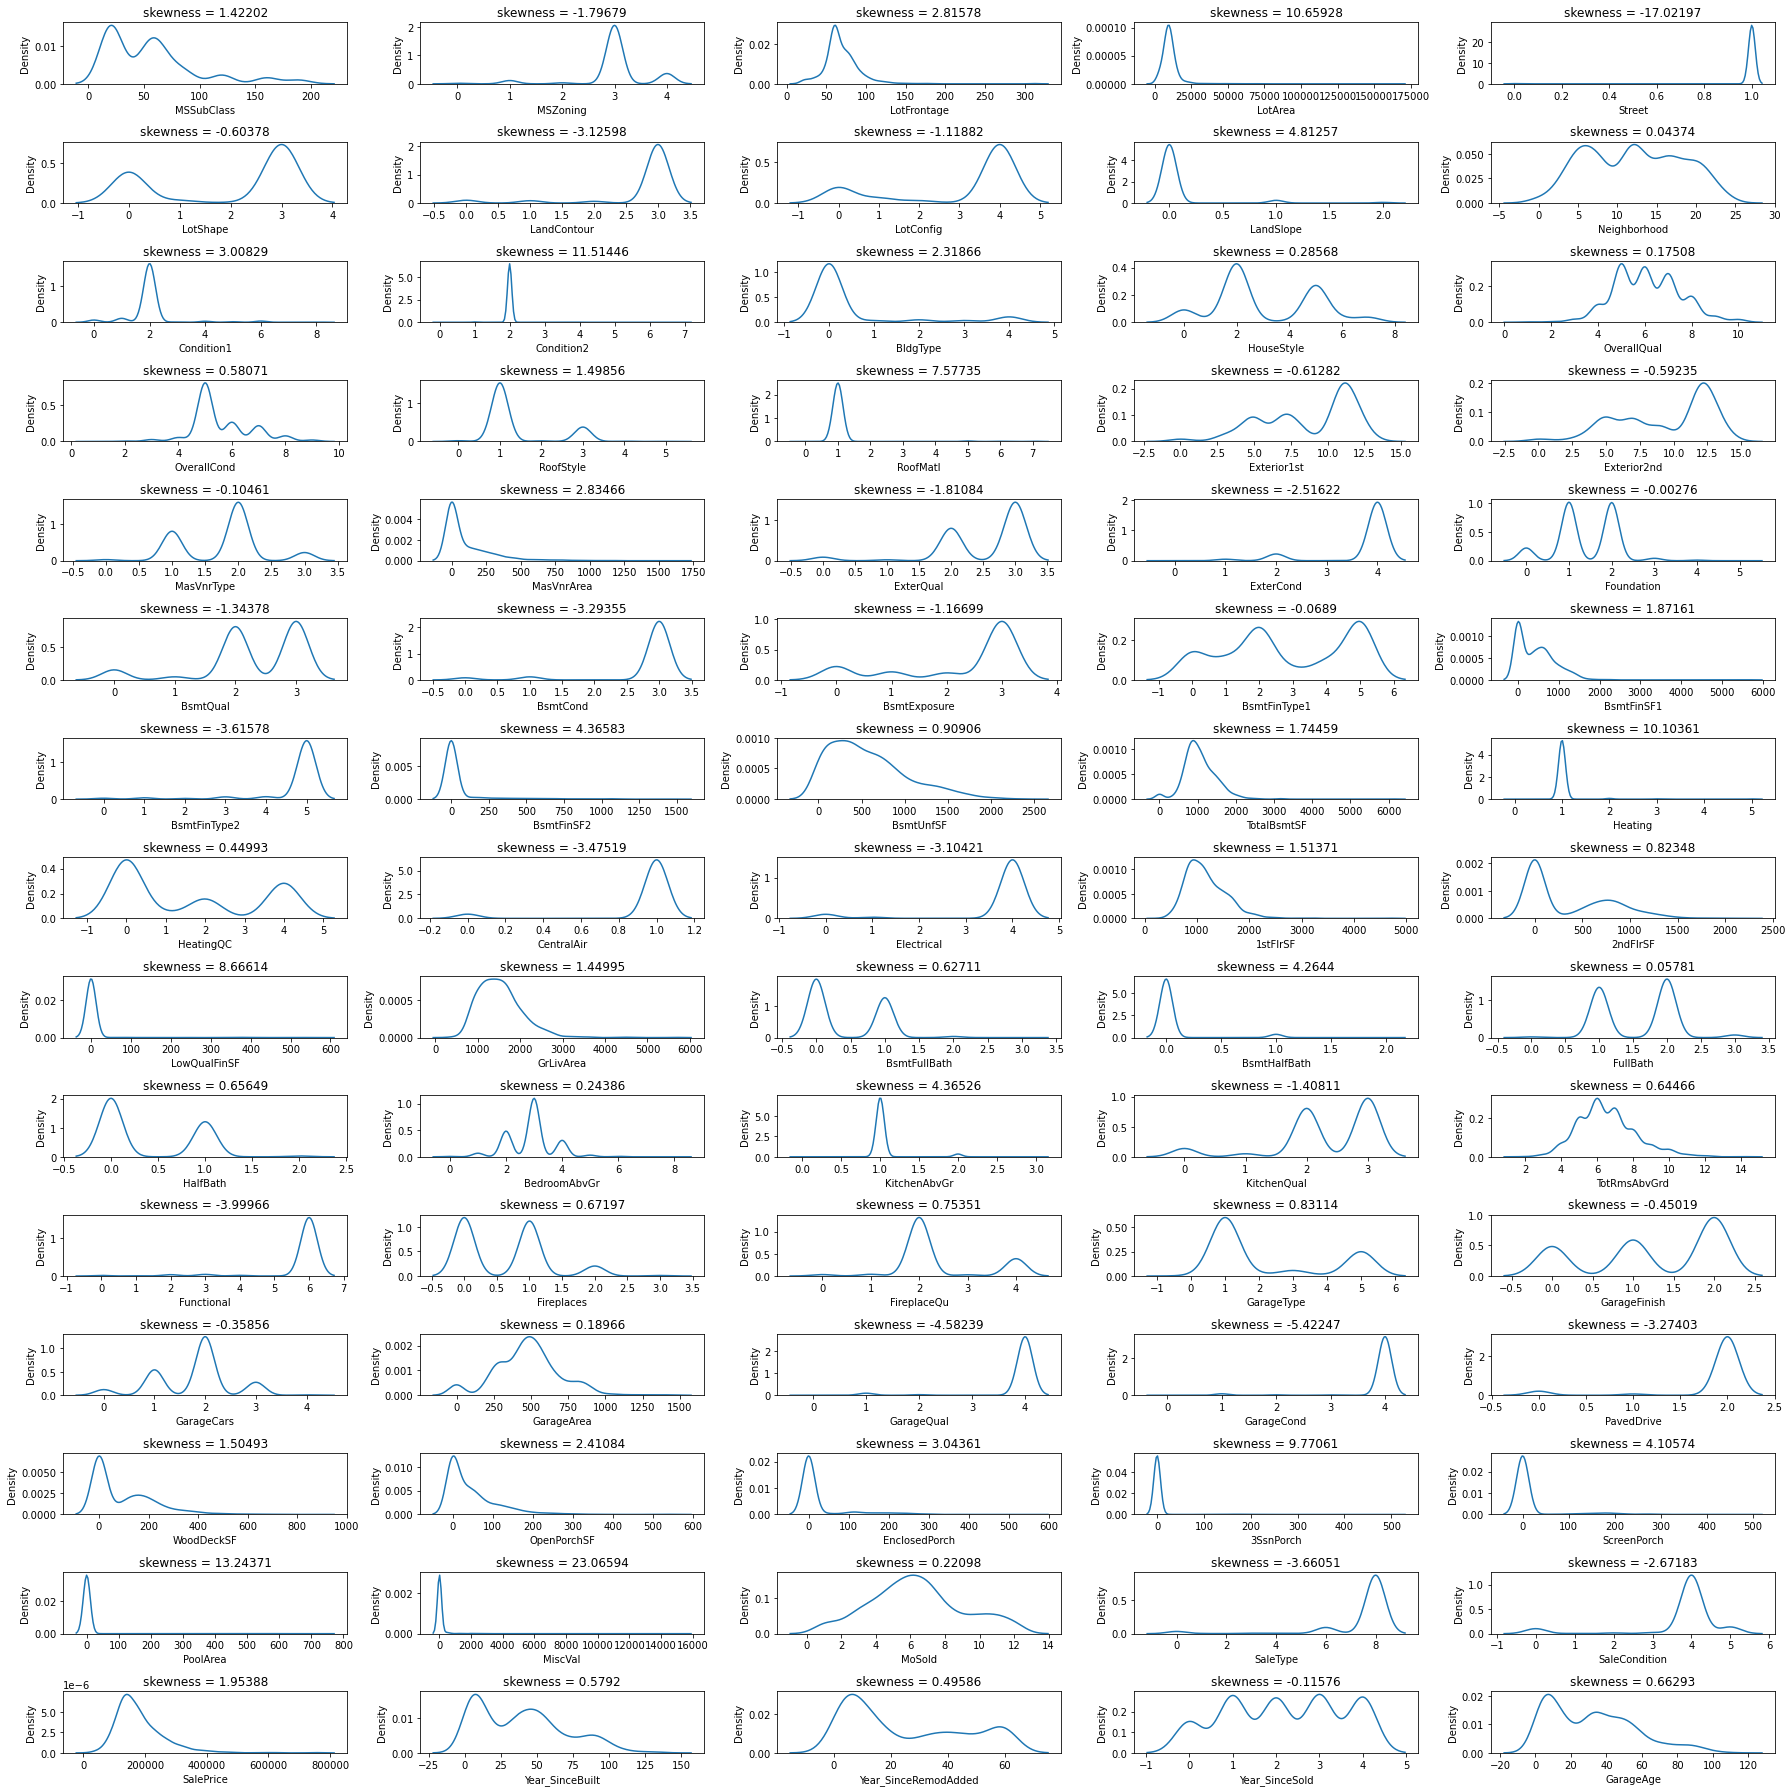

In [34]:
collist = df.columns.values
plt.figure(figsize=(25,25))
for i in range(0,len(collist)):
    plt.subplot(15,5,i+1)
    sns.kdeplot(df[collist[i]])
    plt.title(f"skewness = {round(df[collist[i]].skew(),5)}")
    plt.tight_layout()

Key Observations:

Keeping skew values +/- 0.5 we can find that most columns have more value of skew. This can be removed by power transform method to get model high accuracy.

# Remove skewness:

In [35]:
from sklearn.preprocessing import power_transform

x_new = power_transform(x,method='yeo-johnson')

In [36]:
x = pd.DataFrame((x_new),columns=x.columns)

Now Skewness is removed to some extent

# Scaling Data

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(x),columns=x.columns)

# Multicolinearity:

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Features'] = X.columns
vif


VIF              Features
0    6.282550            MSSubClass
1    1.453260              MSZoning
2    2.078703           LotFrontage
3    2.695442               LotArea
4    1.175317                Street
5    1.339312              LotShape
6    1.590374           LandContour
7    1.165851             LotConfig
8    1.633874             LandSlope
9    1.265057          Neighborhood
10   1.188184            Condition1
11   1.100165            Condition2
12   4.837225              BldgType
13   2.394563            HouseStyle
14   4.229750           OverallQual
15   1.996000           OverallCond
16   1.347478             RoofStyle
17   1.374681              RoofMatl
18   4.632664           Exterior1st
19   4.595459           Exterior2nd
20   1.560758            MasVnrType
21   1.985723            MasVnrArea
22   2.944828             ExterQual
23   1.226885             ExterCond
24   2.143862            Foundation
25   2.577856              BsmtQual
26   1.179018              BsmtCond
27   1.647368          BsmtExposure
28   2.887771          BsmtFinType1
29   6.513165            BsmtFinSF1
30  94.378590          BsmtFinType2
31  94.741803            BsmtFinSF2
32   5.295779             BsmtUnfSF
33   7.316693           TotalBsmtSF
34   1.185406               Heating
35   1.829818             HeatingQC
36   1.592012            CentralAir
37   1.413146            Electrical
38  17.753464              1stFlrSF
39  19.254787              2ndFlrSF
40   1.459956          LowQualFinSF
41  28.956846             GrLivArea
42   2.285589          BsmtFullBath
43   1.259713          BsmtHalfBath
44   3.195731              FullBath
45   2.500773              HalfBath
46   2.760440          BedroomAbvGr
47   1.708325          KitchenAbvGr
48   2.210491           KitchenQual
49   5.175849          TotRmsAbvGrd
50   1.296808            Functional
51   1.914034            Fireplaces
52   1.385661           FireplaceQu
53   1.496834            GarageType
54   2.153460          GarageFinish
55   5.913562            GarageCars
56   5.862046            GarageArea
57   1.657943            GarageQual
58   1.677906            GarageCond
59   1.501274            PavedDrive
60   1.352092            WoodDeckSF
61   1.620869           OpenPorchSF
62   1.388392         EnclosedPorch
63   1.081477             3SsnPorch
64   1.131055           ScreenPorch
65   1.204436              PoolArea
66   1.159516               MiscVal
67   1.097738                MoSold
68   1.373376              SaleType
69   1.483981         SaleCondition
70  12.652639       Year_SinceBuilt
71   3.577098  Year_SinceRemodAdded
72   1.122112        Year_SinceSold
73   6.042573             GarageAge

'BsmtFinSF2'  has high vif value. so we can drop that.

In [39]:
X = X.drop(['BsmtFinSF2'],axis=1)

In [40]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Features'] = X.columns
vif


VIF              Features
0    6.282386            MSSubClass
1    1.453259              MSZoning
2    2.078605           LotFrontage
3    2.695427               LotArea
4    1.175163                Street
5    1.336819              LotShape
6    1.590374           LandContour
7    1.164009             LotConfig
8    1.633853             LandSlope
9    1.265056          Neighborhood
10   1.187178            Condition1
11   1.099071            Condition2
12   4.837198              BldgType
13   2.392365            HouseStyle
14   4.228825           OverallQual
15   1.995900           OverallCond
16   1.347440             RoofStyle
17   1.371021              RoofMatl
18   4.631177           Exterior1st
19   4.595459           Exterior2nd
20   1.557464            MasVnrType
21   1.985632            MasVnrArea
22   2.942163             ExterQual
23   1.226829             ExterCond
24   2.138260            Foundation
25   2.571631              BsmtQual
26   1.178782              BsmtCond
27   1.642111          BsmtExposure
28   2.878158          BsmtFinType1
29   6.496234            BsmtFinSF1
30   1.491641          BsmtFinType2
31   5.289094             BsmtUnfSF
32   7.183953           TotalBsmtSF
33   1.185392               Heating
34   1.829361             HeatingQC
35   1.591374            CentralAir
36   1.413098            Electrical
37  17.752265              1stFlrSF
38  19.229165              2ndFlrSF
39   1.459543          LowQualFinSF
40  28.901517             GrLivArea
41   2.285570          BsmtFullBath
42   1.259045          BsmtHalfBath
43   3.194839              FullBath
44   2.500335              HalfBath
45   2.759990          BedroomAbvGr
46   1.707257          KitchenAbvGr
47   2.210102           KitchenQual
48   5.175841          TotRmsAbvGrd
49   1.296773            Functional
50   1.910569            Fireplaces
51   1.385357           FireplaceQu
52   1.495883            GarageType
53   2.152144          GarageFinish
54   5.913403            GarageCars
55   5.861755            GarageArea
56   1.657495            GarageQual
57   1.677861            GarageCond
58   1.500813            PavedDrive
59   1.351389            WoodDeckSF
60   1.618809           OpenPorchSF
61   1.387981         EnclosedPorch
62   1.081476             3SsnPorch
63   1.131046           ScreenPorch
64   1.203132              PoolArea
65   1.159504               MiscVal
66   1.095269                MoSold
67   1.373340              SaleType
68   1.483788         SaleCondition
69  12.651903       Year_SinceBuilt
70   3.575830  Year_SinceRemodAdded
71   1.119720        Year_SinceSold
72   6.038004             GarageAge

'GrLivArea' has high vif value which can be dropped

In [41]:
X = X.drop(['GrLivArea'],axis=1)

In [42]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Features'] = X.columns
vif


VIF              Features
0    6.137685            MSSubClass
1    1.452225              MSZoning
2    2.078576           LotFrontage
3    2.693417               LotArea
4    1.169539                Street
5    1.334063              LotShape
6    1.590367           LandContour
7    1.163541             LotConfig
8    1.632893             LandSlope
9    1.265051          Neighborhood
10   1.185521            Condition1
11   1.098949            Condition2
12   4.724746              BldgType
13   2.222442            HouseStyle
14   4.160081           OverallQual
15   1.986796           OverallCond
16   1.345527             RoofStyle
17   1.363214              RoofMatl
18   4.622584           Exterior1st
19   4.585232           Exterior2nd
20   1.552842            MasVnrType
21   1.985119            MasVnrArea
22   2.941940             ExterQual
23   1.226212             ExterCond
24   2.126926            Foundation
25   2.571553              BsmtQual
26   1.176653              BsmtCond
27   1.640784          BsmtExposure
28   2.877526          BsmtFinType1
29   6.494586            BsmtFinSF1
30   1.491065          BsmtFinType2
31   5.288840             BsmtUnfSF
32   7.123831           TotalBsmtSF
33   1.184715               Heating
34   1.823941             HeatingQC
35   1.590473            CentralAir
36   1.412772            Electrical
37   6.479782              1stFlrSF
38   6.949423              2ndFlrSF
39   1.173129          LowQualFinSF
40   2.285569          BsmtFullBath
41   1.258816          BsmtHalfBath
42   3.034043              FullBath
43   2.414508              HalfBath
44   2.725320          BedroomAbvGr
45   1.703506          KitchenAbvGr
46   2.203847           KitchenQual
47   4.857245          TotRmsAbvGrd
48   1.291299            Functional
49   1.889087            Fireplaces
50   1.384436           FireplaceQu
51   1.494542            GarageType
52   2.141358          GarageFinish
53   5.911025            GarageCars
54   5.837957            GarageArea
55   1.657131            GarageQual
56   1.677796            GarageCond
57   1.497069            PavedDrive
58   1.351369            WoodDeckSF
59   1.616030           OpenPorchSF
60   1.376402         EnclosedPorch
61   1.081132             3SsnPorch
62   1.130082           ScreenPorch
63   1.202757              PoolArea
64   1.159496               MiscVal
65   1.094405                MoSold
66   1.370226              SaleType
67   1.482682         SaleCondition
68  12.616593       Year_SinceBuilt
69   3.575067  Year_SinceRemodAdded
70   1.118286        Year_SinceSold
71   6.034624             GarageAge

'Year_SinceBuilt' has high vif value. lets drop it.


In [43]:
X = X.drop(['Year_SinceBuilt'],axis=1)

In [44]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Features'] = X.columns
vif


VIF              Features
0   6.057881            MSSubClass
1   1.430888              MSZoning
2   2.077333           LotFrontage
3   2.691997               LotArea
4   1.169446                Street
5   1.332051              LotShape
6   1.588726           LandContour
7   1.160817             LotConfig
8   1.627546             LandSlope
9   1.261943          Neighborhood
10  1.184822            Condition1
11  1.091312            Condition2
12  4.688008              BldgType
13  2.202315            HouseStyle
14  3.933297           OverallQual
15  1.727884           OverallCond
16  1.342004             RoofStyle
17  1.359446              RoofMatl
18  4.622569           Exterior1st
19  4.583639           Exterior2nd
20  1.548799            MasVnrType
21  1.960531            MasVnrArea
22  2.928812             ExterQual
23  1.204756             ExterCond
24  1.935939            Foundation
25  2.470241              BsmtQual
26  1.171344              BsmtCond
27  1.626120          BsmtExposure
28  2.871811          BsmtFinType1
29  6.487897            BsmtFinSF1
30  1.491046          BsmtFinType2
31  5.287994             BsmtUnfSF
32  7.102810           TotalBsmtSF
33  1.184595               Heating
34  1.803437             HeatingQC
35  1.558789            CentralAir
36  1.403538            Electrical
37  6.351742              1stFlrSF
38  6.847513              2ndFlrSF
39  1.151866          LowQualFinSF
40  2.284998          BsmtFullBath
41  1.258816          BsmtHalfBath
42  2.947415              FullBath
43  2.362789              HalfBath
44  2.723508          BedroomAbvGr
45  1.702793          KitchenAbvGr
46  2.195886           KitchenQual
47  4.841355          TotRmsAbvGrd
48  1.283757            Functional
49  1.879581            Fireplaces
50  1.378913           FireplaceQu
51  1.487399            GarageType
52  2.105797          GarageFinish
53  5.898228            GarageCars
54  5.826433            GarageArea
55  1.647339            GarageQual
56  1.673189            GarageCond
57  1.442058            PavedDrive
58  1.350375            WoodDeckSF
59  1.614135           OpenPorchSF
60  1.292262         EnclosedPorch
61  1.080197             3SsnPorch
62  1.124316           ScreenPorch
63  1.202750              PoolArea
64  1.158394               MiscVal
65  1.094096                MoSold
66  1.356682              SaleType
67  1.469536         SaleCondition
68  3.392541  Year_SinceRemodAdded
69  1.118258        Year_SinceSold
70  5.024663             GarageAge

Now, all values are less than 10 no need to drop further columns.

# Training the model

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [46]:
acc = 0

for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=i,test_size=.22)
    lr = LinearRegression()
    lr.fit(x_test,y_test)
    y_pred = lr.predict(x_test)
    temp = r2_score(y_test,y_pred)
    
    if temp>acc:
        acc = temp
        best_rstate = i
print("Accuracy Score : ",acc*100,"Random State : ",best_rstate)

Accuracy Score :  93.75253187824352 Random State :  877


In [47]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=877,test_size=.22)


In [48]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [49]:
lr = LinearRegression()
la = Lasso()
ri = Ridge()
el = ElasticNet()
kn = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
svr = SVR()
rfr = RandomForestRegressor()
ada = AdaBoostRegressor()
gr = GradientBoostingRegressor()
xgb = XGBRegressor()

In [50]:
model = [lr,la ,ri,el,kn,dtr,svr,rfr,ada,gr,xgb]

In [51]:
score = []
mean_squared_err = []
mean_absolute_err = []
r2 = []

for m in model:
    m.fit(x_train,y_train)
    m.score(x_test,y_test)
    predm = m.predict(x_test)
    print("Accuracy Score of ",m," is ",m.score(x_train,y_train))
    score.append(m.score(x_train,y_train))
    
    print("Mean Squared Error is ",mean_squared_error(y_test,predm))
    mean_squared_err.append(mean_squared_error(y_test,predm))
    print("Mean Absolute Error is ",mean_absolute_error(y_test,predm))
    mean_absolute_err.append(mean_absolute_error(y_test,predm))
    print("R2 Score is ",r2_score(y_test,predm))
    r2.append(r2_score(y_test,predm))
    print("\n\n")

Accuracy Score of  LinearRegression()  is  0.8320847573445096
Mean Squared Error is  1385808343.0923483
Mean Absolute Error is  22679.732617364814
R2 Score is  0.8081006677622541



Accuracy Score of  Lasso()  is  0.8320847332606152
Mean Squared Error is  1385688687.559255
Mean Absolute Error is  22678.16203852448
R2 Score is  0.8081172370209209



Accuracy Score of  Ridge()  is  0.832084140142928
Mean Squared Error is  1385755686.3146753
Mean Absolute Error is  22676.528604373292
R2 Score is  0.808107959391377



Accuracy Score of  ElasticNet()  is  0.8141221573280071
Mean Squared Error is  1489435944.8422742
Mean Absolute Error is  22462.784624940607
R2 Score is  0.7937508713590695



Accuracy Score of  KNeighborsRegressor()  is  0.8225983926850005
Mean Squared Error is  1827702336.8393776
Mean Absolute Error is  24082.444357976656
R2 Score is  0.7469095494213864



Accuracy Score of  DecisionTreeRegressor()  is  1.0
Mean Squared Error is  1302640518.758755
Mean Absolute Error is  25

We have RandomForestRegressor with 97% score and GradientBoostingRegressor with 96% accuracy score. Lets cross validate to find which has better accuracy.

# Cross Validation:

In [52]:
mean_score = []
std = []

for m in model:
    CV = cross_val_score(m,x,y,cv=5)
    print("Score of ", m ," is ", CV)
    print("Mean score is : ",CV.mean())
    mean_score.append(CV.mean())
    print("Standard Deviation is : ",CV.std())
    std.append(CV.std())
    print('\n')

Score of  LinearRegression()  is  [0.78335581 0.76175025 0.60858781 0.82766633 0.78446133]
Mean score is :  0.7531643064551607
Standard Deviation is :  0.07538920669452026


Score of  Lasso()  is  [0.78338703 0.76189508 0.608689   0.82769157 0.78454285]
Mean score is :  0.7532411029350798
Standard Deviation is :  0.07536796448868065


Score of  Ridge()  is  [0.78346762 0.76234052 0.6098054  0.82775366 0.78505411]
Mean score is :  0.7536842601379498
Standard Deviation is :  0.07501126525149635


Score of  ElasticNet()  is  [0.78626938 0.77562527 0.69047169 0.82529161 0.83531361]
Mean score is :  0.7825943133888549
Standard Deviation is :  0.051285545153442844


Score of  KNeighborsRegressor()  is  [0.7273917  0.76180962 0.69491028 0.74696118 0.74139509]
Mean score is :  0.7344935714053101
Standard Deviation is :  0.022656180902048878


Score of  DecisionTreeRegressor()  is  [0.74805602 0.65514282 0.70699435 0.76703989 0.65903141]
Mean score is :  0.7072528971361686
Standard Deviation is

We have GradientBoostingRegressor with 86% accuracy

# HyperTuning

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
GBR = GradientBoostingRegressor()
parameters = {'learning_rate':[0.01,0.02,0.03,0.04],
             'subsample' : [0.9,0.5,0.2,0.1],
             'n_estimators':[100,150,200,250],
             'max_depth': [4,6,8,10]}

grid_GBR = GridSearchCV(estimator=GBR,param_grid=parameters,cv=2,n_jobs=1)
grid_GBR.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 150, 200, 250],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [55]:
print("Results from Grid Search : ")
print("\n The best estimator across all search params :",grid_GBR.best_estimator_)
print("\n The best score for all searched params :",grid_GBR.best_score_)
print("\n The best parameters for all searched params : ",grid_GBR.best_params_)

Results from Grid Search : 

 The best estimator across all search params : GradientBoostingRegressor(learning_rate=0.03, max_depth=6, n_estimators=200,
                          subsample=0.2)

 The best score for all searched params : 0.8353195105200903

 The best parameters for all searched params :  {'learning_rate': 0.03, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.2}


After hypertuning we have 83% accuracy

In [56]:
final_grid_gbr = grid_GBR.best_estimator_

In [57]:
final_grid_gbr.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.03, max_depth=6, n_estimators=200,
                          subsample=0.2)

Accuracy in hypertuning is reduced which is due to the model tried to reduce overfitting.

In [58]:
final_grid_gbr.score(x_test,y_test)

0.911636699083623

# Saving the best model:

In [59]:
import joblib
joblib.dump(grid_GBR,"House_Price_Prediction.obj")

['House_Price_Prediction.obj']

# Predicting House Price for Test dataset

In [60]:
df1 = pd.read_csv(r"C:\Users\poovi\Downloads\Project-Housing--2---1-\Project-Housing_splitted\test.csv")
df1.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

In [61]:
df1.shape

(292, 80)

In [62]:
df1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [63]:
df1.nunique()

Id               292
MSSubClass        15
MSZoning           4
LotFrontage       65
LotArea          249
Street             2
Alley              2
LotShape           4
LandContour        4
Utilities          2
LotConfig          5
LandSlope          3
Neighborhood      24
Condition1         8
Condition2         2
BldgType           5
HouseStyle         8
OverallQual        8
OverallCond        7
YearBuilt         84
YearRemodAdd      57
RoofStyle          5
RoofMatl           3
Exterior1st       12
Exterior2nd       14
MasVnrType         4
MasVnrArea       104
ExterQual          4
ExterCond          4
Foundation         6
BsmtQual           4
BsmtCond           3
BsmtExposure       4
BsmtFinType1       6
BsmtFinSF1       184
BsmtFinType2       6
BsmtFinSF2        32
BsmtUnfSF        231
TotalBsmtSF      224
Heating            4
HeatingQC          4
CentralAir         2
Electrical         4
1stFlrSF         238
2ndFlrSF         113
LowQualFinSF       4
GrLivArea        246
BsmtFullBath 

we can drop ID column as it has all unique values and does not contribute more to dataset

In [64]:
df1 = df1.drop(['Id','Utilities'],axis=1)

In [65]:
df1.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

we can drop columns which has more than 90% null values. 'Alley','PoolQC','Fence','MiscFeature' has large number of null values which can dropped

In [66]:
df1 = df1.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)

In [67]:
df1.shape

(292, 74)

In [68]:
#checking the value count of each column
for i in df1.columns:
    print(df1[i].value_counts())
    print("\n")

20     108
60      55
50      31
120     18
30      17
160     16
80      15
90      11
70       7
180      4
190      4
45       2
75       2
85       1
40       1
Name: MSSubClass, dtype: int64


RL         223
RM          55
FV          13
C (all)      1
Name: MSZoning, dtype: int64


60.0     32
85.0     14
50.0     13
70.0     12
21.0      9
65.0      9
80.0      9
75.0      7
52.0      6
63.0      6
78.0      6
66.0      5
64.0      5
57.0      5
43.0      4
72.0      4
55.0      4
100.0     4
40.0      4
74.0      4
102.0     3
48.0      3
93.0      3
79.0      3
86.0      3
110.0     3
67.0      3
90.0      3
68.0      3
44.0      3
76.0      3
24.0      3
56.0      2
83.0      2
58.0      2
92.0      2
32.0      2
35.0      2
73.0      2
47.0      2
96.0      2
107.0     2
42.0      2
51.0      2
37.0      2
62.0      2
91.0      2
98.0      2
105.0     1
150.0     1
61.0      1
45.0      1
137.0     1
89.0      1
34.0      1
124.0     1
138.0     1
33.0      1
30.0      1
120

Here we can observe that 'BsmtFinSF2' have more 0's so i will drop these columns.

In [69]:
df1 = df1.drop(['BsmtFinSF2'],axis=1)

In [70]:
df1.shape

(292, 73)

In [71]:
df1.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr 

In [72]:
df1.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object
Electrical        object
1stFlrSF           int64


In [73]:
col = df1.columns
num_col = df1._get_numeric_data().columns
cat_col = list(set(col)-set(num_col))
cat_col

['Condition1',
 'BsmtQual',
 'Electrical',
 'MasVnrType',
 'PavedDrive',
 'GarageType',
 'RoofStyle',
 'SaleType',
 'LandSlope',
 'Functional',
 'LotConfig',
 'Foundation',
 'BsmtExposure',
 'BsmtCond',
 'Condition2',
 'BldgType',
 'GarageCond',
 'BsmtFinType2',
 'MSZoning',
 'Heating',
 'Exterior2nd',
 'FireplaceQu',
 'ExterQual',
 'BsmtFinType1',
 'LotShape',
 'HeatingQC',
 'Street',
 'Exterior1st',
 'GarageFinish',
 'KitchenQual',
 'RoofMatl',
 'Neighborhood',
 'GarageQual',
 'CentralAir',
 'HouseStyle',
 'ExterCond',
 'SaleCondition',
 'LandContour']

In [74]:
num_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [75]:
for i in range(0,len(num_col)):
    if df1[num_col[i]].dtypes != "object":
        df1[num_col[i]].fillna(df1[num_col[i]].mean(),inplace=True)

In [76]:
for i in range(0,len(cat_col)):
    if df1[cat_col[i]].dtypes != "float":
        df1[cat_col[i]].fillna(df1[cat_col[i]].mode()[0],inplace=True)
    

In [77]:
#to check null values again after removing null values
df1.isnull().sum().sum()

0

In [78]:
df1['Year_SinceBuilt'] = df1['YearBuilt'].max() - df1['YearBuilt']
df1['Year_SinceRemodAdded'] = df1['YearRemodAdd'].max() - df1['YearRemodAdd']
df1['Year_SinceSold'] = df1['YrSold'].max() - df1['YrSold']
df1['GarageAge'] = df1['GarageYrBlt'].max() - df1['GarageYrBlt']

In [79]:
df1 = df1.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'],axis=1)

In [80]:
df1.head(5)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          20       RL    86.000000    14157   Pave      IR1         HLS   
1         120       RL    66.425101     5814   Pave      IR1         Lvl   
2          20       RL    66.425101    11838   Pave      Reg         Lvl   
3          70       RL    75.000000    12000   Pave      Reg         Bnk   
4          60       RL    86.000000    14598   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Corner       Gtl      StoneBr       Norm       Norm     1Fam     1Story   
1   CulDSac       Gtl      StoneBr       Norm       Norm   TwnhsE     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     1Story   
3    Inside       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4   CulDSac       Gtl      Somerst      Feedr       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            9            5       Hip  CompShg     VinylSd     VinylSd   
1            8            5     Gable  CompShg     HdBoard     HdBoard   
2            8            5       Hip  CompShg     VinylSd     VinylSd   
3            7            7     Gable  CompShg     MetalSd     MetalSd   
4            6            5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0      Stone       200.0        Gd        TA      PConc       Ex       TA   
1       None         0.0        Gd        TA     CBlock       Gd       TA   
2       None         0.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     CBlock       TA       TA   
4      Stone        74.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtUnfSF  TotalBsmtSF  \
0           Gd          GLQ        1249          Unf        673         1922   
1           Av          GLQ        1036          Unf        184         1220   
2           Av          Unf           0          Unf       1753         1753   
3           No          Rec         275          Unf        429          704   
4           Mn          Unf           0          Unf        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa             7        Typ           1          Gd   
4             1          Gd             9        Typ           1          Gd   

  GarageType GarageFinish  GarageCars  GarageArea GarageQual GarageCond  \
0     Attchd          Fin           3         676         TA         TA   
1     Attchd          RFn           2         565         TA         TA   
2     Attchd          RFn 

# Data Visualization:

In [81]:
col = df1.columns
num_col = df1._get_numeric_data().columns
cat_col = list(set(col)-set(num_col))

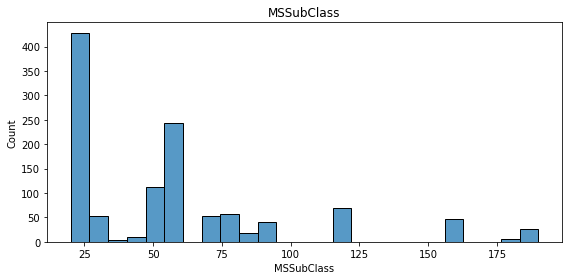

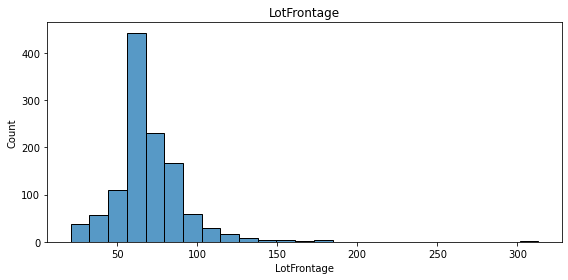

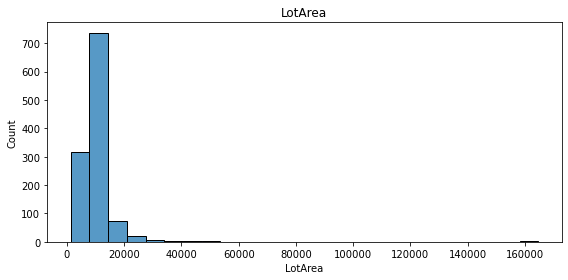

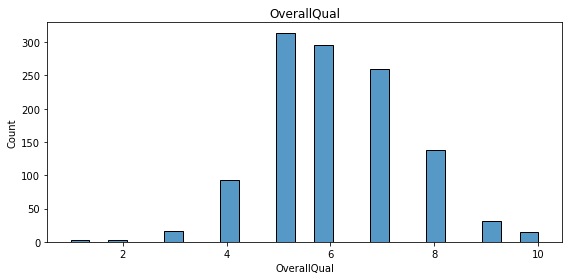

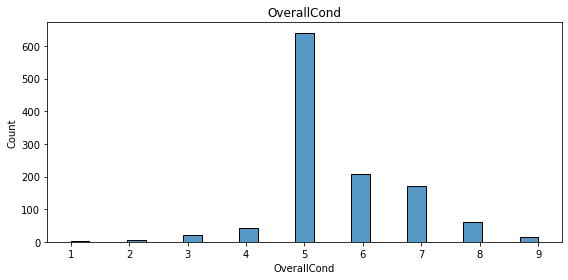

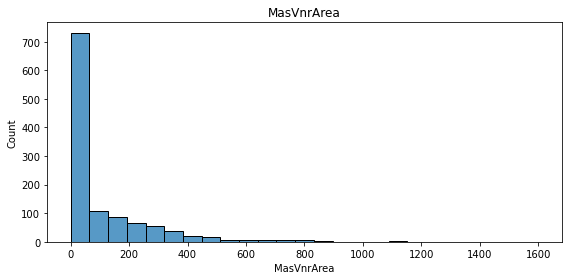

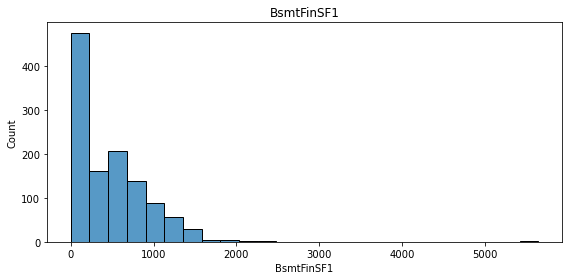

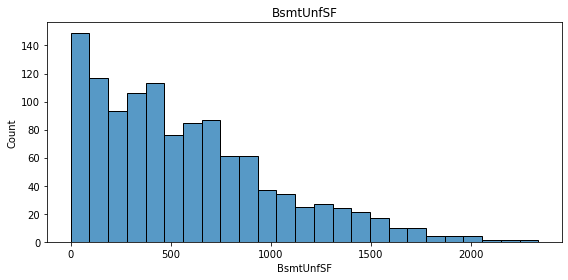

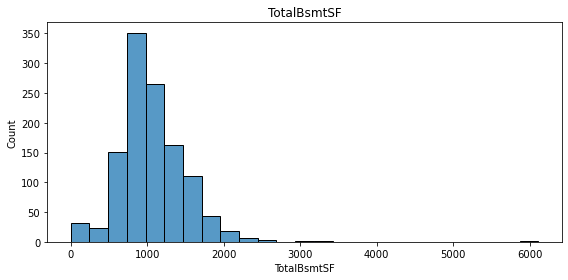

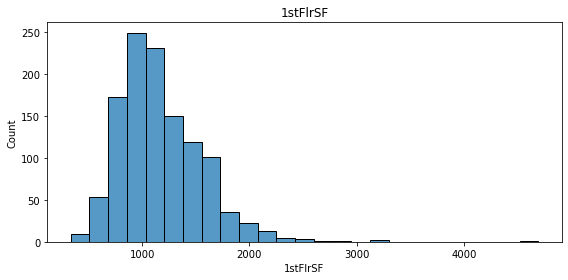

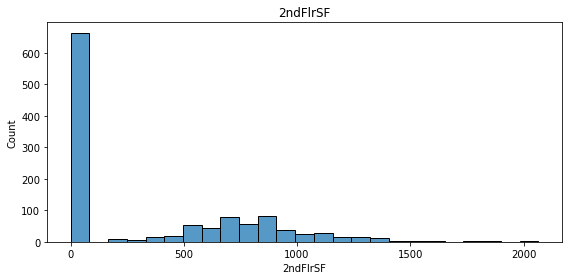

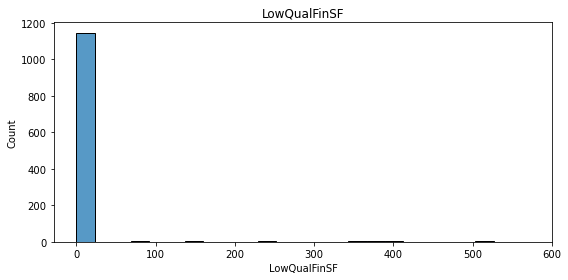

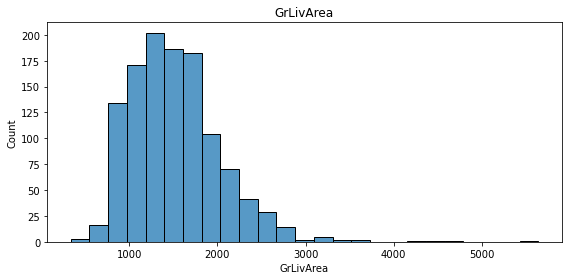

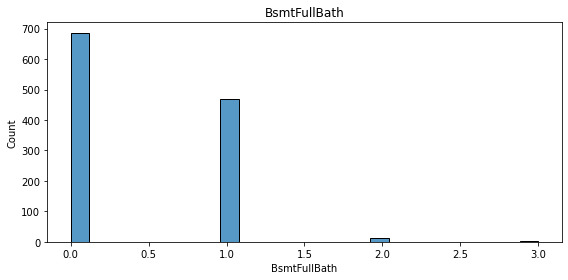

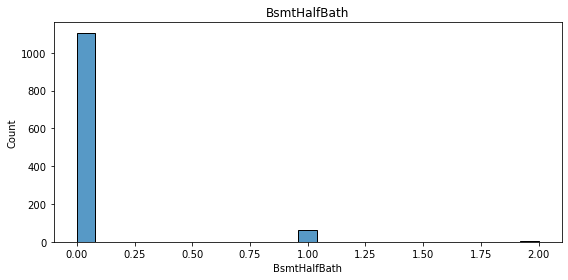

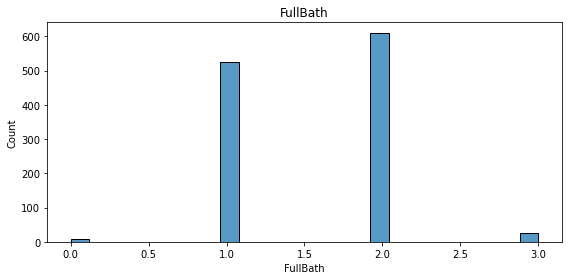

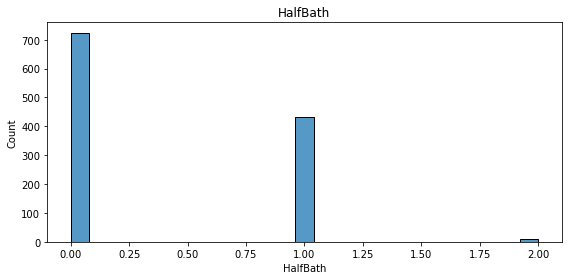

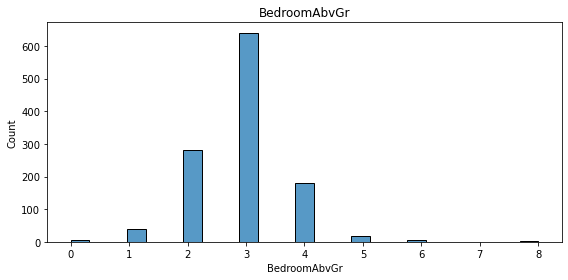

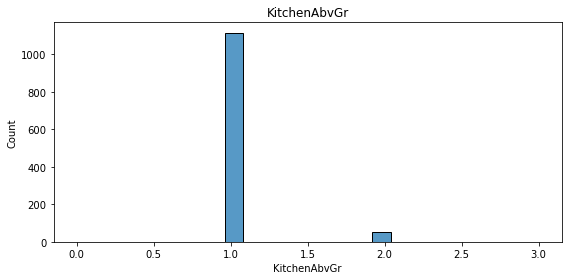

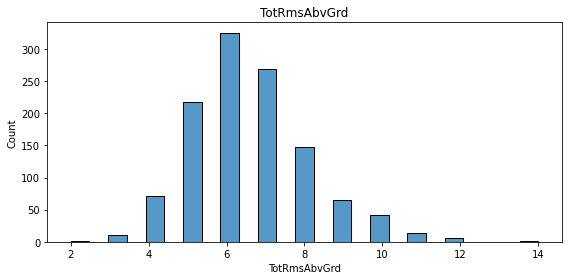

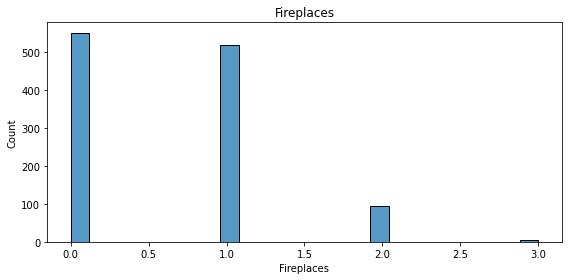

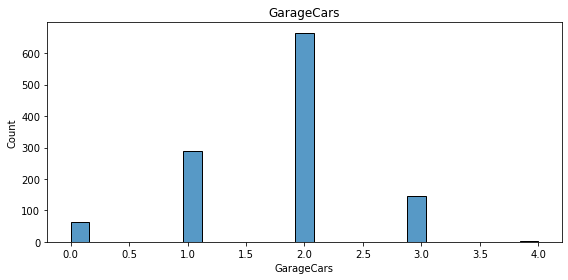

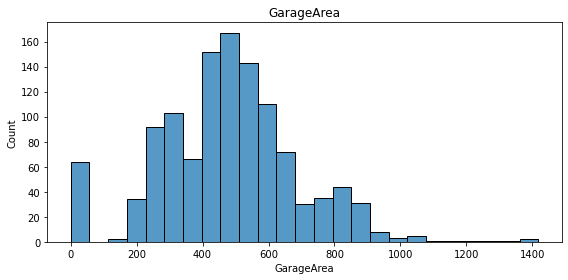

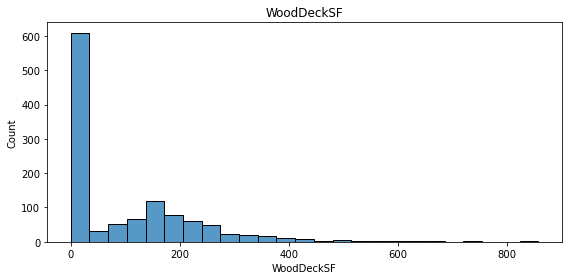

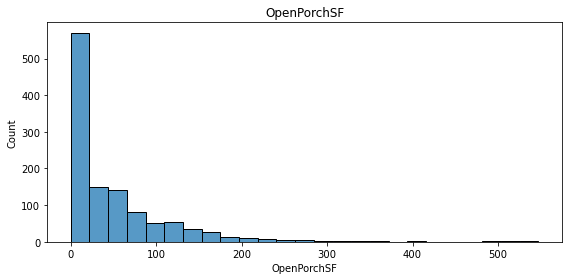

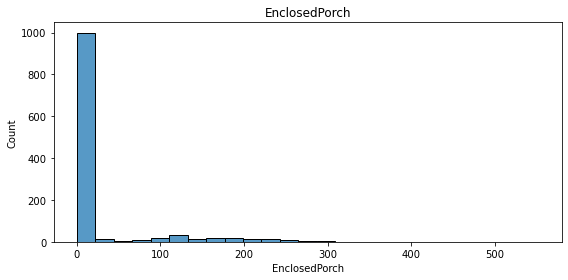

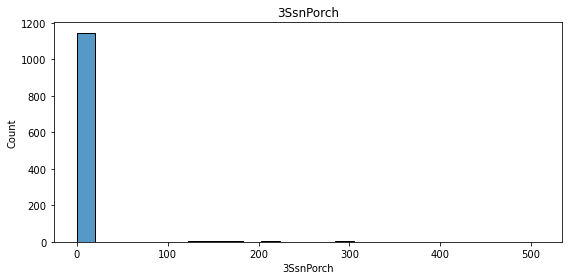

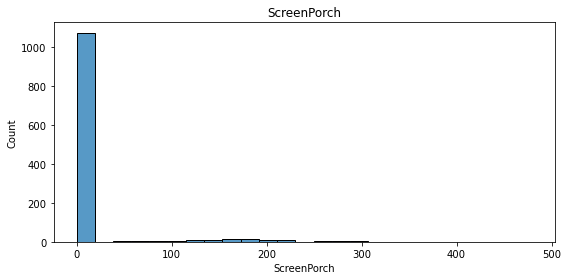

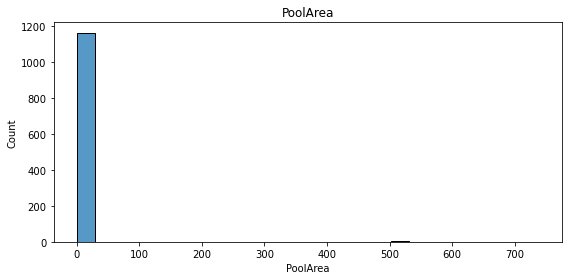

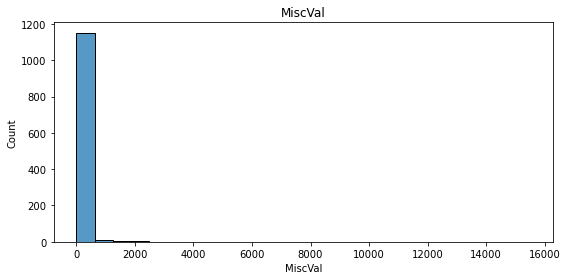

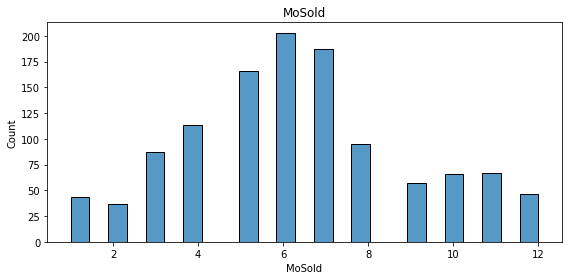

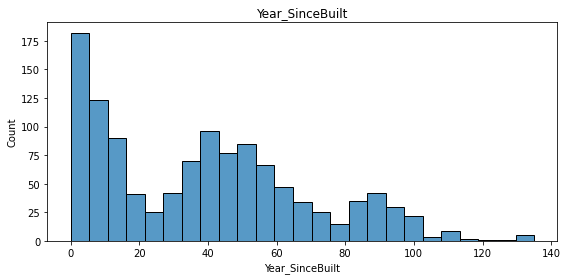

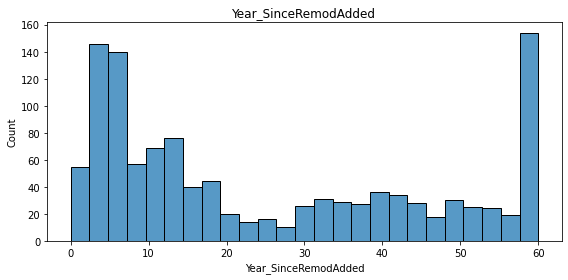

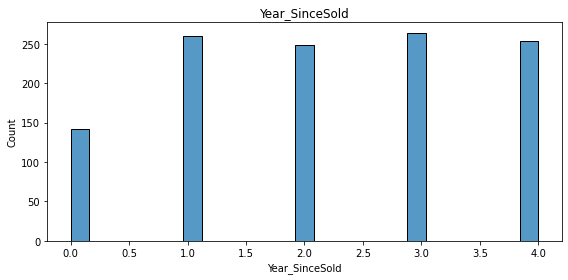

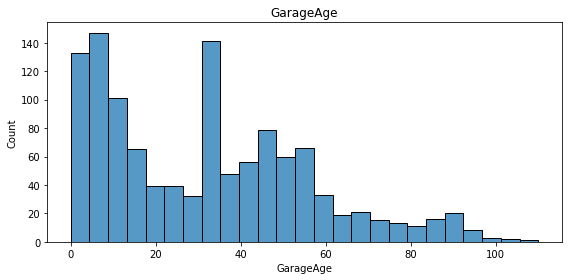

In [82]:
for i in df1[num_col]:
    plt.figure(figsize=(8,4))
    sns.histplot(df[i],bins=25)
    plt.title(i)
    plt.tight_layout()

Key Observations:

1. As MSSubClass is increasing, sales is decreasing. And it is seen between 25-75 there are more number of sales.
2. As LotFrontage increases, sales decreases. And more sales is between 25 and 100
3. As LotArea increases, sales decreases.
4. OverallQual is more between 4 and 8.
6. OverallCond is more at 5 and then sales decreases. Sales deponds on condition of the building if it is good sales increases otherwise it decreases.
7. AS MasVnrArea increases, sales decreases.
8. AS BsmtFinSF1 increases, sales decreases.
9. As BsmtFinSF2 increases, sales decreases.
10. As BsmtUnfSF increases, sales decreases gradually.
11. As TotalBsmtSF increases, sales decreases.
12. As 1stFlrSF increases, sales decreases.
13. Sales is more at 2ndFlrSF at 0-50. Then it gradually decreases.
14. GrLivArea increases, sales decreases.
15. HalfBath,Kitchen may prefers 1 room. As size increases sales decreases.
16. GarageCar mostly prefered onr is 2 car parking.
17. Mostly prefered GarageAre is between 400 and 800. As area increases sales decreases.
18. As OpenPorchSf increases, sales decreases.
19. Many Prefer ClosedPorch.
20. As age of building increases, sales decreases. Most of them prefer newly constructed building


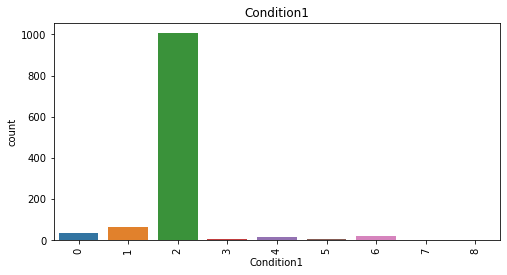

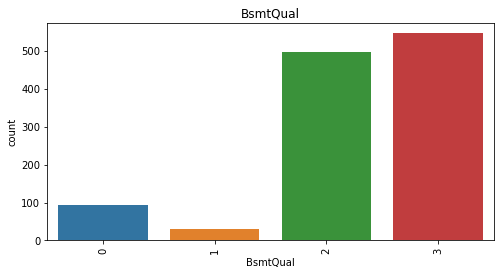

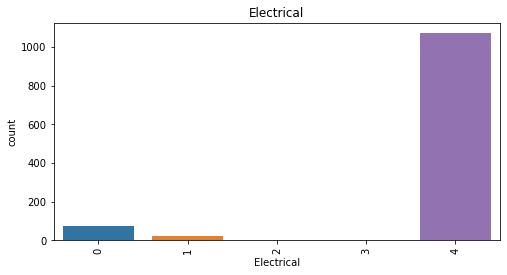

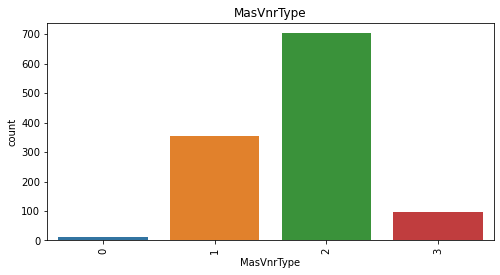

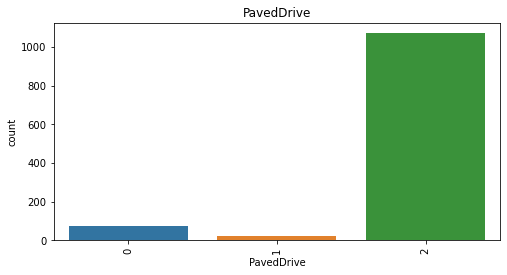

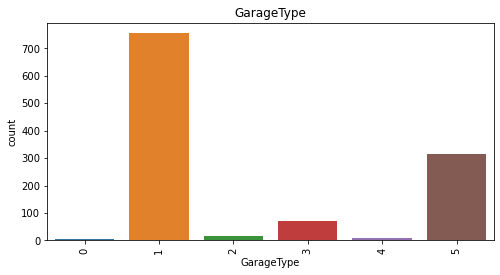

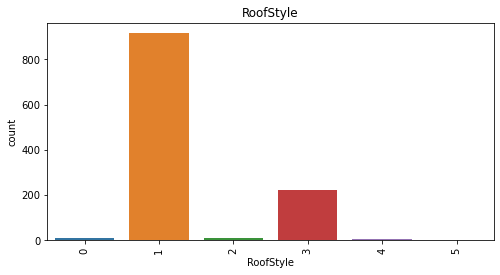

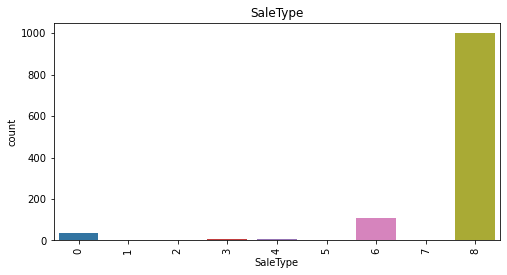

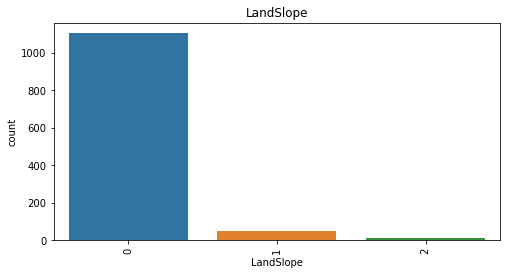

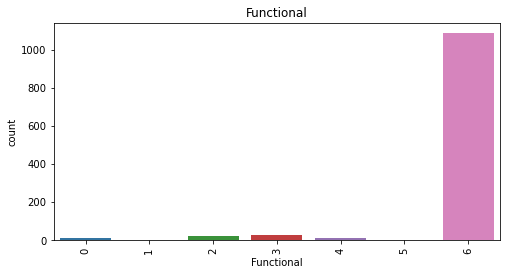

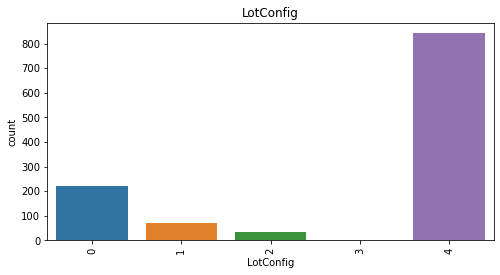

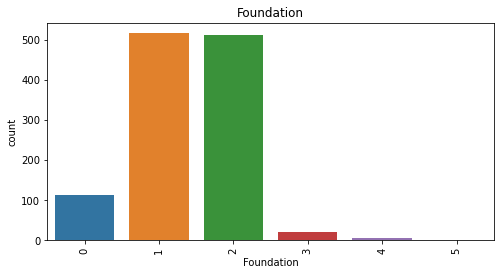

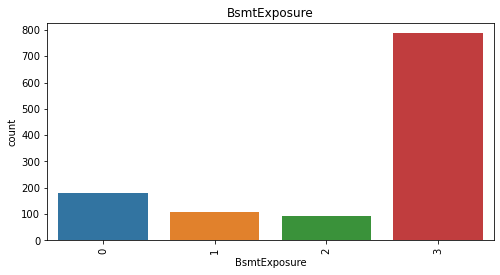

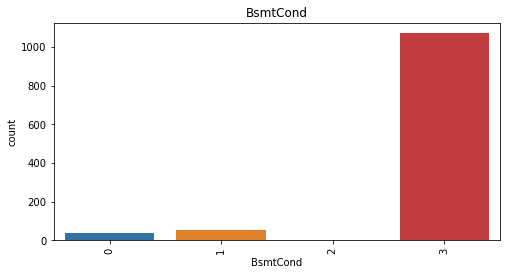

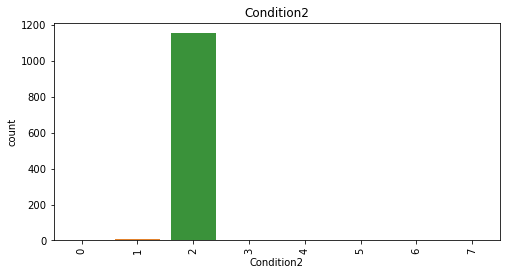

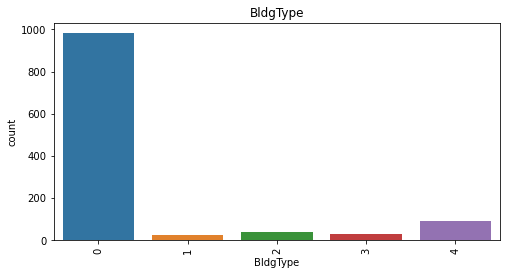

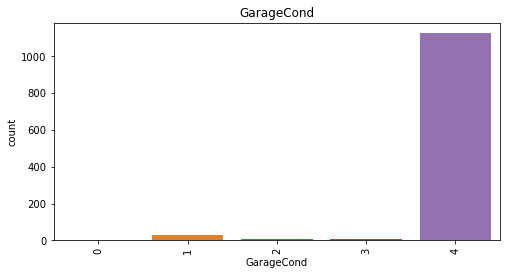

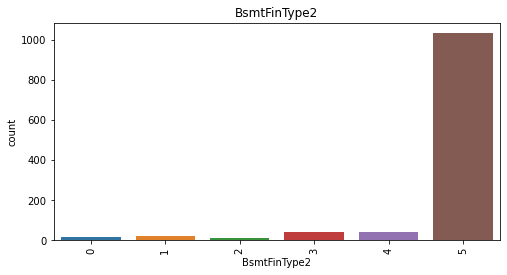

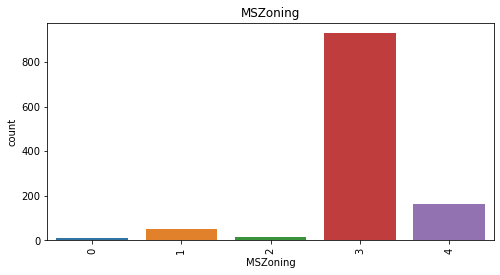

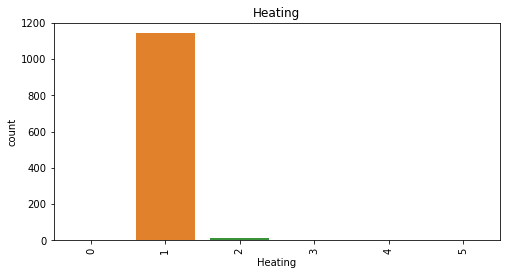

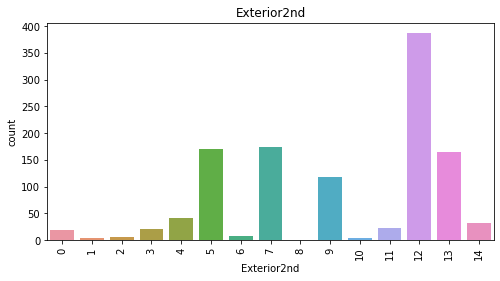

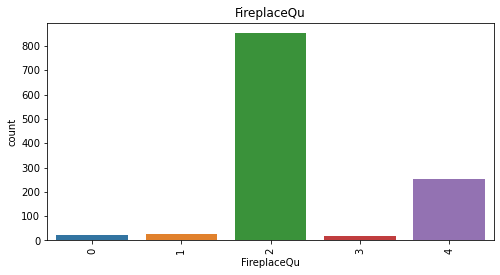

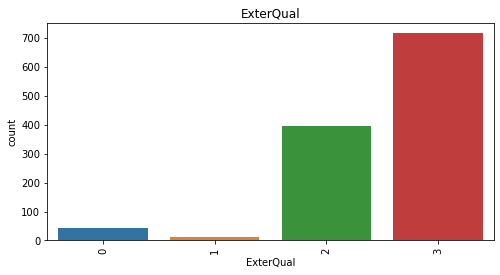

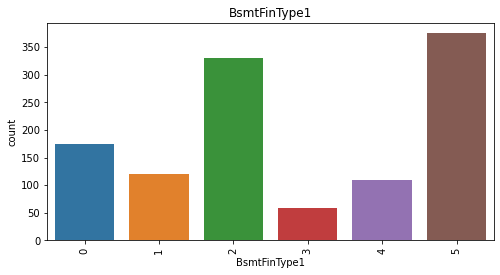

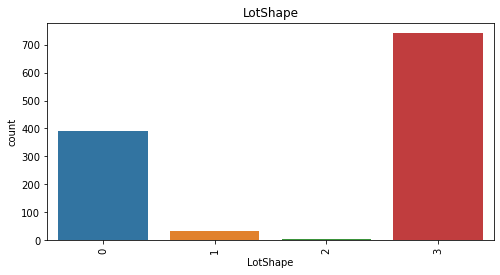

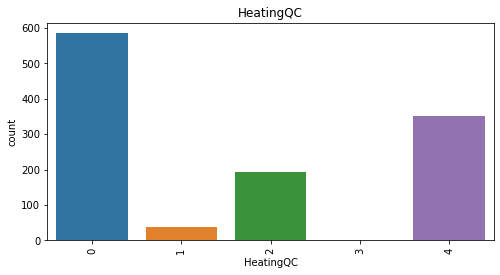

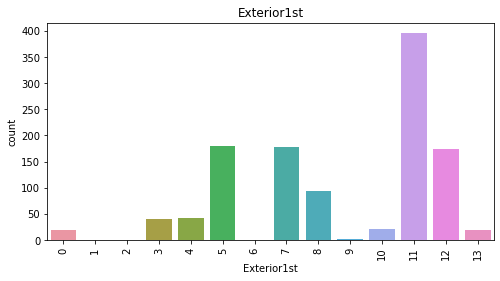

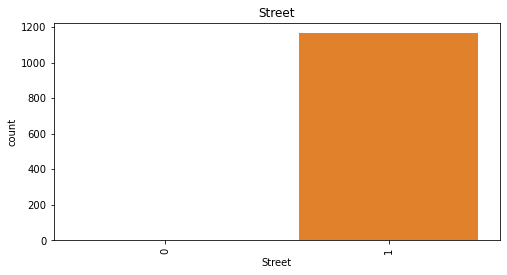

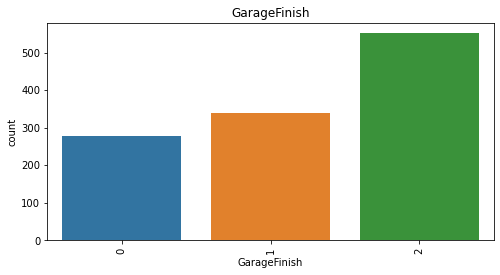

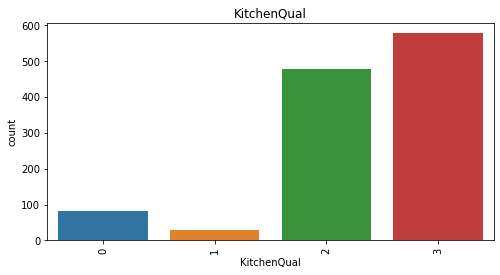

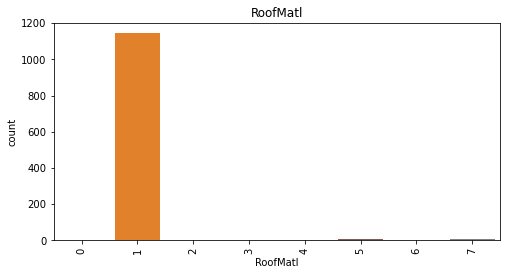

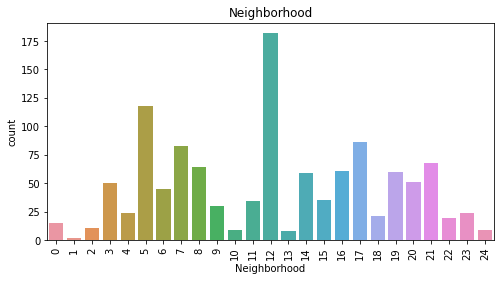

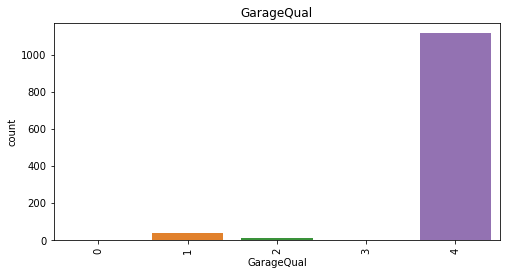

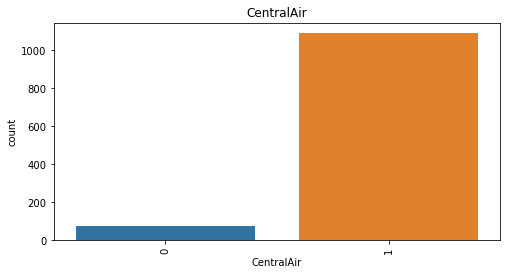

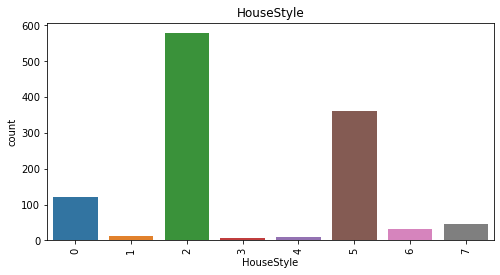

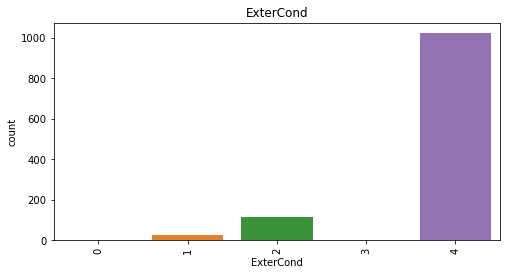

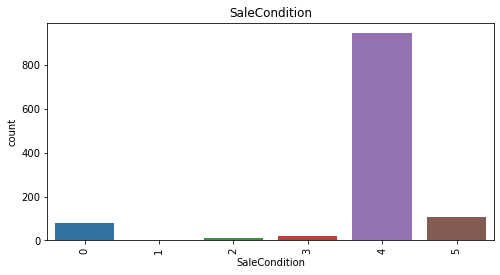

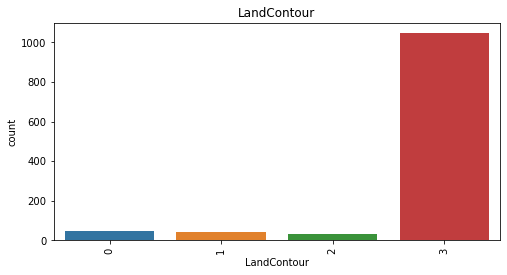

In [83]:
for i in cat_col:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df,x=df[i])
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

Key Observations:

1. Evaluates the quality of material on the exterior TA(average/Typical) has more sales followed by gd(Good)
2. Proximity to various conditions(if more than one is present) Norm(Normal) sales is more.
3. Many prefered Vinyl Sliding(VinylSd) followed by Hard Board(HDBoard),Metal Sliding(MetalSd), WoodSliding(Wd Sliding)
4. Garage Location - Attached to Home(Attchd) sees high sales followed by Detached from home(Detchd).
5. BsmtExposure(Walkout or Garden level walls) many sales is done with No Basement followed by Av(Average Exposure).
6. Functional: Many sales is done for Typical Funcionality(Typ).
7. More sales is done in North Ames(NAmes) followed by College Creek(CollgCr) which sees high sales. and lowest sales is seen in Bluestem(Bluestem).
8. In Rating of basement finished area(BsmtFinType2) many sales donw eith Unf(Unfinished), followed by LwQ(Low Quality)
9. Many sales done foe TA(Typical/Average) Garage Condition.
10. Many sales is seen with Unf(Unfinished) GarageFinish.
11. Sales Type is high in WD(Warranty Deed) followed by New(Home just constructed and sold).
12. LotShape(General Shape of Propert)- Reg(Regular) has seen more sales.
13. LandSlope(Slope of Property) -Gtl(Gentle Slope) has seen high sales.
14. Many sales are done with CentralAir conditioning.
15. Lvl(Near Flat/Level) has seen more slaes in LandContour(Flatness of Property)
16. MasVnrType(Masonry veneer type)- None has seen more slaes followed by BrkFace(Brick Face).
17. Foundation(Type of foundation) - CBlock(Cinder Block) has more sales followed by PConc(Poured Contrete)
18. BldgType(Type of Dwelling)- 1Fam(Single Family detached) has more sales, followed by TwnhsE(Townhouse End Unit)
19. MSZoning(General zoning classification)- more sales is done with RL(Residential Low Density) followed by RM(Residential Medium Density).
20. Electrical(Electrical System)- Many slaes is done for SBkr(Standard Circuit Breakers & Romex).
21. SaleCondition - Mostly Normal Sale is done followed by Partial.
22. Mostly 1Storey has ssen high sales followed by 2Storey in HouseStyle.
23. GasA(Gas forces warm air furnace) with excellent quality is prefered in Heating Type which has seen large number of slaes.
24. RoofStyle and Material most sales happed with CompShg(Standard(composite) shingle) with Gable material.
25. Most saled happed with PavedDrive
26. LotConfig(Lot Configuration) Inside lot has seen more sales.
27. Lot of sales is seen in Good Fireplace Quality.
28. More sales is seen with Pave Street than Gravel street.
29. Kitchen, ExternalQual, GarageQual sales is seen high in TA(Average).

# Convert categorical data to numeric using label encoder

In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_col:
    df1[i] = le.fit_transform(df1[i])

In [86]:
df1.head(5)

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          20         2    86.000000    14157       1         0            1   
1         120         2    66.425101     5814       1         0            3   
2          20         2    66.425101    11838       1         3            3   
3          70         2    75.000000    12000       1         3            0   
4          60         2    86.000000    14598       1         0            3   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0          0          0            21           2           0         0   
1          1          0            21           2           0         4   
2          4          0             4           2           0         0   
3          4          0             5           2           0         0   
4          1          0            20           1           0         0   

   HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  Exterior1st  \
0           2            9            5          3         0            9   
1           2            8            5          1         0            5   
2           2            8            5          3         0            9   
3           5            7            7          1         0            6   
4           5            6            5          1         0            9   

   Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0           11           3       200.0          2          3           2   
1            5           2         0.0          2          3           1   
2           11           2         0.0          2          3           2   
3            7           2         0.0          3          3           1   
4           11           3        74.0          2          3           2   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0         0         2             1             2        1249             5   
1         2         2             0             2        1036             5   
2         2         2             0             5           0             5   
3         3         2             3             4         275             5   
4         2         2             2             5           0             5   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        673         1922        0          0           1           3   
1        184         1220        0          2           1           3   
2       1753         1753        0          0           1           3   
3        429          704        0          0           1           3   
4        894          894        0          0           1           3   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0      1922         0             0       1922             1             0   
1      1360         0             0       1360             1             0   
2      1788         0             0       1788             0             0   
3       860       704             0       1564             0             0   
4       894      1039             0       1933             0             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         0             3             1            2             8   
1         1         0             1             1            2             4   
2         2         0             3             1            0             7   
3         1         1             3             1            1             7   
4         2         1             4             1            2             9   

   Functional  Fireplaces  FireplaceQu  GarageType  GarageFinish  GarageCars  \
0           5           1            2           1             0           3   
1           5           1            0           1             1           2   
2           5           1            4         

In [87]:
df1.describe()

MSSubClass    MSZoning  LotFrontage        LotArea      Street  \
count  292.000000  292.000000   292.000000     292.000000  292.000000   
mean    57.414384    2.136986    66.425101   10645.143836    0.993151   
std     43.780649    0.478114    19.975962   13330.669795    0.082618   
min     20.000000    0.000000    21.000000    1526.000000    0.000000   
25%     20.000000    2.000000    57.750000    7200.000000    1.000000   
50%     50.000000    2.000000    66.425101    9200.000000    1.000000   
75%     70.000000    2.000000    76.000000   11658.750000    1.000000   
max    190.000000    3.000000   150.000000  215245.000000    1.000000   

         LotShape  LandContour   LotConfig   LandSlope  Neighborhood  \
count  292.000000   292.000000  292.000000  292.000000    292.000000   
mean     1.958904     2.791096    3.078767    0.054795     11.681507   
std      1.398953     0.699182    1.541174    0.242576      6.004975   
min      0.000000     0.000000    0.000000    0.000000      0.000000   
25%      0.000000     3.000000    2.000000    0.000000      6.000000   
50%      3.000000     3.000000    4.000000    0.000000     11.000000   
75%      3.000000     3.000000    4.000000    0.000000     16.000000   
max      3.000000     3.000000    4.000000    2.000000     23.000000   

       Condition1  Condition2    BldgType  HouseStyle  OverallQual  \
count  292.000000  292.000000  292.000000  292.000000   292.000000   
mean     2.023973    0.003425    0.561644    3.017123     6.078767   
std      0.834876    0.058521    1.265305    1.964386     1.356147   
min      0.000000    0.000000    0.000000    0.000000     3.000000   
25%      2.000000    0.000000    0.000000    2.000000     5.000000   
50%      2.000000    0.000000    0.000000    2.000000     6.000000   
75%      2.000000    0.000000    0.000000    5.000000     7.000000   
max      7.000000    1.000000    4.000000    7.000000    10.000000   

       OverallCond   RoofStyle    RoofMatl  Exterior1st  Exterior2nd  \
count   292.000000  292.000000  292.000000   292.000000   292.000000   
mean      5.493151    1.441781    0.010274     7.404110     8.780822   
std       1.063267    0.845466    0.130676     2.302184     3.032455   
min       3.000000    0.000000    0.000000     0.000000     0.000000   
25%       5.000000    1.000000    0.000000     5.000000     7.000000   
50%       5.000000    1.000000    0.000000     9.000000    11.000000   
75%       6.000000    1.000000    0.000000     9.000000    11.000000   
max       9.000000    4.000000    2.000000    11.000000    13.000000   

       MasVnrType   MasVnrArea   ExterQual   ExterCond  Foundation  \
count  292.000000   292.000000  292.000000  292.000000  292.000000   
mean     1.777397   109.171821    2.575342    2.876712    1.400685   
std      0.627357   174.729023    0.671825    0.377920    0.773531   
min      0.000000     0.000000    0.000000    0.000000    0.000000   
25%      1.000000     0.000000    2.000000    3.000000    1.000000   
50%      2.000000     0.000000    3.000000    3.000000    1.000000   
75%      2.000000   180.000000    3.000000    3.000000    2.000000   
max      3.000000  1031.000000    3.000000    3.000000    5.000000   

         BsmtQual    BsmtCond  BsmtExposure  BsmtFinType1   BsmtFinSF1  \
count  292.000000  292.000000    292.000000    292.000000   292.000000   
mean     2.270548    1.928082      2.328767      2.681507   439.294521   
std      0.892170    0.328956      1.116016      1.808134   429.559675   
min      0.000000    0.000000      0.000000      0.000000     0.000000   
25%      2.000000    2.000000      2.000000      1.750000     0.000000   
50%      2.000000    2.000000      3.000000      2.000000   369.500000   
75%      3.000000    2.000000      3.000000      5.000000   700.500000   
max      3.000000    2.000000      3.000000      5.000000  1767.000000   

       BsmtFinType2    BsmtUnfSF  TotalBsmtSF     Heating  HeatingQC  \
count    292.000000   292.000000   292.000000  292

In [88]:
df1.corr()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass              1.000000  0.266517    -0.454786 -0.186654  0.004588   
MSZoning                0.266517  1.000000    -0.335754 -0.117968 -0.063162   
LotFrontage            -0.454786 -0.335754     1.000000  0.370091 -0.056531   
LotArea                -0.186654 -0.117968     0.370091  1.000000 -0.069626   
Street                  0.004588 -0.063162    -0.056531 -0.069626  1.000000   
LotShape                0.176681  0.167716    -0.147720 -0.110574 -0.002444   
LandContour             0.068736 -0.099137    -0.086163 -0.131482  0.153613   
LotConfig               0.071784  0.055261    -0.124470 -0.042599  0.058229   
LandSlope              -0.073979 -0.035312     0.176406  0.620079 -0.324146   
Neighborhood           -0.081962 -0.204984     0.184817  0.137189 -0.045972   
Condition1              0.042599 -0.059909     0.064350  0.010799 -0.246714   
Condition2             -0.036770  0.105995    -0.018887 -0.019035  0.004868   
BldgType                0.798007  0.230251    -0.436593 -0.190456 -0.028820   
HouseStyle              0.455233 -0.068366    -0.080950 -0.015258  0.043073   
OverallQual            -0.116077 -0.276394     0.254760  0.109161  0.066173   
OverallCond            -0.068113  0.191126    -0.096571 -0.071113  0.077702   
RoofStyle              -0.183492 -0.031210     0.199222  0.182766 -0.054925   
RoofMatl               -0.019367 -0.022604     0.077308  0.004290  0.006540   
Exterior1st            -0.103303 -0.028611     0.018168 -0.124700 -0.021532   
Exterior2nd            -0.202425 -0.028994     0.035881 -0.101138 -0.019729   
MasVnrType             -0.092343  0.010358     0.055159 -0.016483  0.036783   
MasVnrArea              0.002757 -0.107398     0.136119  0.062943 -0.001823   
ExterQual               0.009859  0.245917    -0.240355 -0.060410  0.071241   
ExterCond              -0.051525 -0.096395     0.075450  0.026250 -0.027138   
Foundation              0.072808 -0.195382     0.130965  0.013464  0.043091   
BsmtQual                0.000375  0.138389    -0.136363 -0.041860 -0.021395   
BsmtCond               -0.015342 -0.111940     0.129209  0.021130 -0.018187   
BsmtExposure           -0.049358  0.050552    -0.114149 -0.162388  0.099047   
BsmtFinType1            0.003453  0.038716    -0.007482 -0.087270 -0.037657   
BsmtFinSF1             -0.142908 -0.153966     0.152566  0.209632 -0.037222   
BsmtFinType2            0.043449 -0.015825    -0.115149 -0.030670  0.110019   
BsmtUnfSF              -0.169129 -0.123688     0.161516 -0.029717  0.070999   
TotalBsmtSF            -0.336822 -0.270929     0.398795  0.283111 -0.029632   
Heating                 0.049709  0.094397     0.011852  0.179646  0.011782   
HeatingQC               0.118102  0.228922    -0.118978  0.016198 -0.085239   
CentralAir             -0.053192 -0.235065     0.031703  0.049270  0.156680   
Electrical              0.075568 -0.035888     0.020348  0.028097 -0.025961   
1stFlrSF               -0.350270 -0.212694     0.463473  0.286714 -0.013672   
2ndFlrSF                0.338926 -0.030786    -0.014547  0.030128  0.066596   
LowQualFinSF            0.012343  0.010704     0.202729  0.030371  0.008058   
GrLivArea               0.030615 -0.176389     0.333808  0.231721  0.045793   
BsmtFullBath           -0.000676 -0.084559     0.085464  0.212162 -0.094062   
BsmtHalfBath           -0.041577 -0.017534    -0.044632  0.020883  0.021908   
FullBath                0.095903 -0.236326     0.227718  0.141118  0.087362   
HalfBath                0.213601 -0.179885     0.036555  0.034980 -0.023607   
BedroomAbvGr           -0.061750 -0.104881     0.227534  0.134990  0.030347   
KitchenAbvGr            0.275461  0.150506    -0.011201 -0.030264  0.018095   
KitchenQual             0.093439  0.198917    -0.246413 -0.041457 -0.062637   
TotRmsAbvGrd            0.002973 -0.123578     0.328972  0.211624  0.068251   
Functional             -0.075457 -0.131738    -0.002318  0.015773 -0.018

<AxesSubplot:>

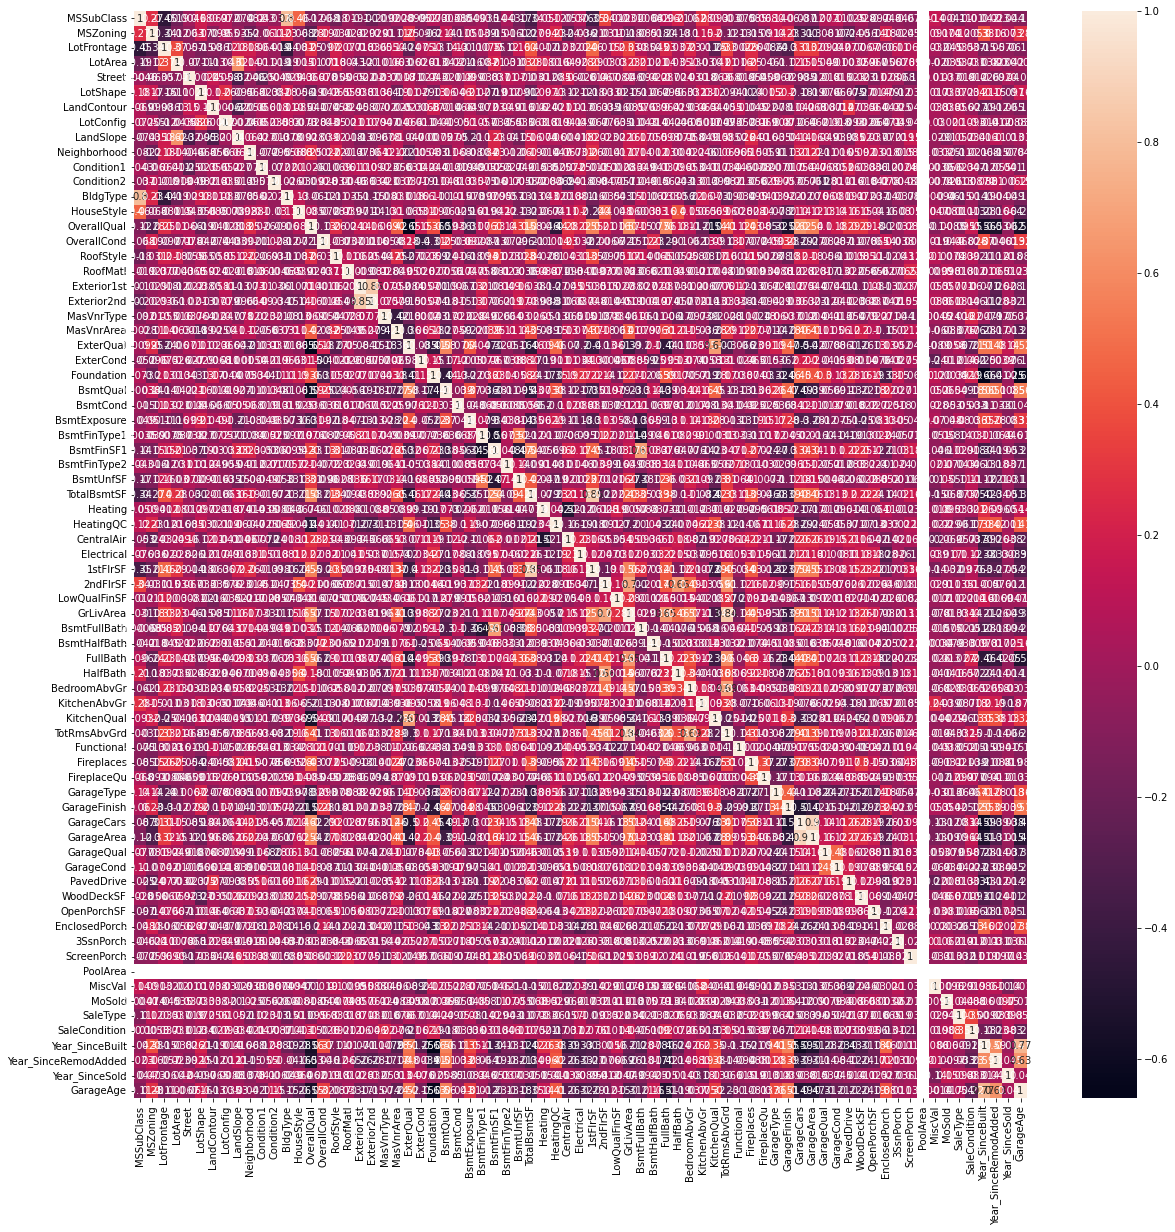

In [89]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True)

# Outliers Detection:

MSSubClass                 AxesSubplot(0.125,0.837584;0.133621x0.0424157)
MSZoning                AxesSubplot(0.285345,0.837584;0.133621x0.0424157)
LotFrontage              AxesSubplot(0.44569,0.837584;0.133621x0.0424157)
LotArea                 AxesSubplot(0.606034,0.837584;0.133621x0.0424157)
Street                  AxesSubplot(0.766379,0.837584;0.133621x0.0424157)
LotShape                   AxesSubplot(0.125,0.786685;0.133621x0.0424157)
LandContour             AxesSubplot(0.285345,0.786685;0.133621x0.0424157)
LotConfig                AxesSubplot(0.44569,0.786685;0.133621x0.0424157)
LandSlope               AxesSubplot(0.606034,0.786685;0.133621x0.0424157)
Neighborhood            AxesSubplot(0.766379,0.786685;0.133621x0.0424157)
Condition1                 AxesSubplot(0.125,0.735787;0.133621x0.0424157)
Condition2              AxesSubplot(0.285345,0.735787;0.133621x0.0424157)
BldgType                 AxesSubplot(0.44569,0.735787;0.133621x0.0424157)
HouseStyle              AxesSubplot(0.

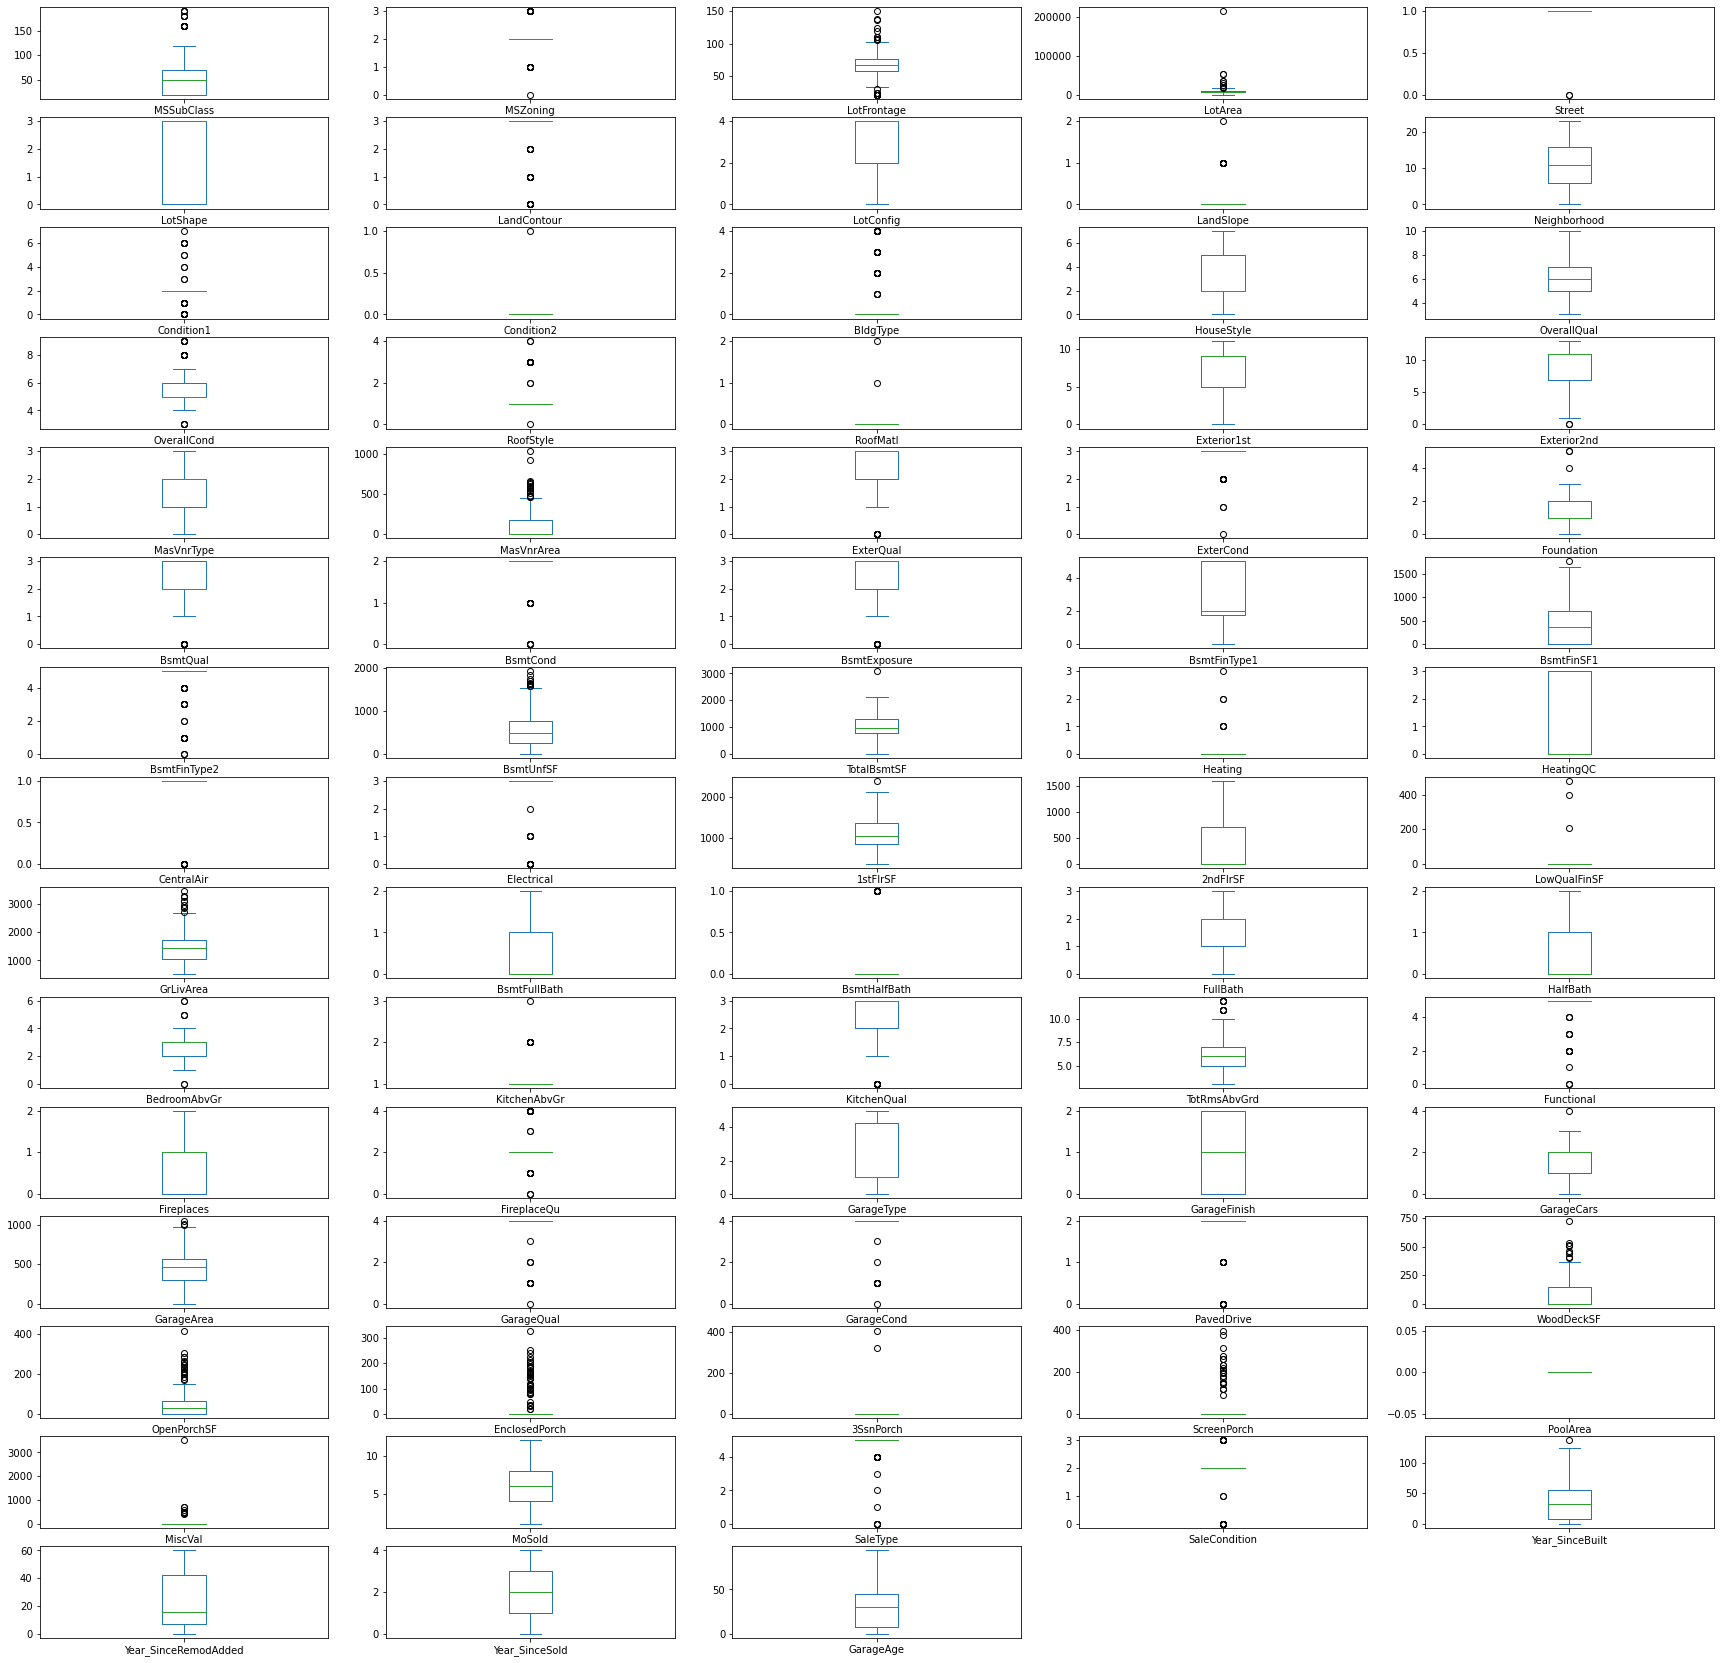

In [90]:
df1.plot(kind='box',figsize=(30,30),subplots='True',layout=(15,5))

Key Observation:
    

Outliers are present in 'MSSubClass', 'LotFrontage', 'LotArea','OverallCond', 'MasVnrArea', 'BsmtUnfSF','GrlivArea', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotalRmsAbvGrd', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF'

# Removing Outliers:

In [91]:
from scipy.stats import zscore
z = np.abs(zscore(df1))
threshold = 3
df1_new = df1[(z<3).all(axis=1)]

In [92]:
print("Old DataFrame : ",df1.shape)
print("New DataFrame : ",df1_new.shape)
print("Rows Dropped : ",df1.shape[0]-df1_new.shape[0])

Old DataFrame :  (292, 73)
New DataFrame :  (0, 73)
Rows Dropped :  292


In [93]:
percentage_loss = (292-141)/292*100
percentage_loss

51.71232876712328

There is large amount of dataloss so we need to do furtehr analysis by keeping outliers.

# Skewness

In [94]:
df1.skew()

MSSubClass               1.358597
MSZoning                 0.187174
LotFrontage              0.466813
LotArea                 12.781805
Street                 -12.020386
LotShape                -0.639195
LandContour             -3.332422
LotConfig               -1.204667
LandSlope                4.639043
Neighborhood             0.046894
Condition1               2.808950
Condition2              17.088007
BldgType                 1.997202
HouseStyle               0.386773
OverallQual              0.397312
OverallCond              1.209714
RoofStyle                1.386333
RoofMatl                13.717569
Exterior1st             -0.643455
Exterior2nd             -0.672944
MasVnrType               0.037914
MasVnrArea               1.976804
ExterQual               -1.920606
ExterCond               -3.595056
Foundation               0.380626
BsmtQual                -1.348604
BsmtCond                -4.869596
BsmtExposure            -1.289092
BsmtFinType1             0.040656
BsmtFinSF1    

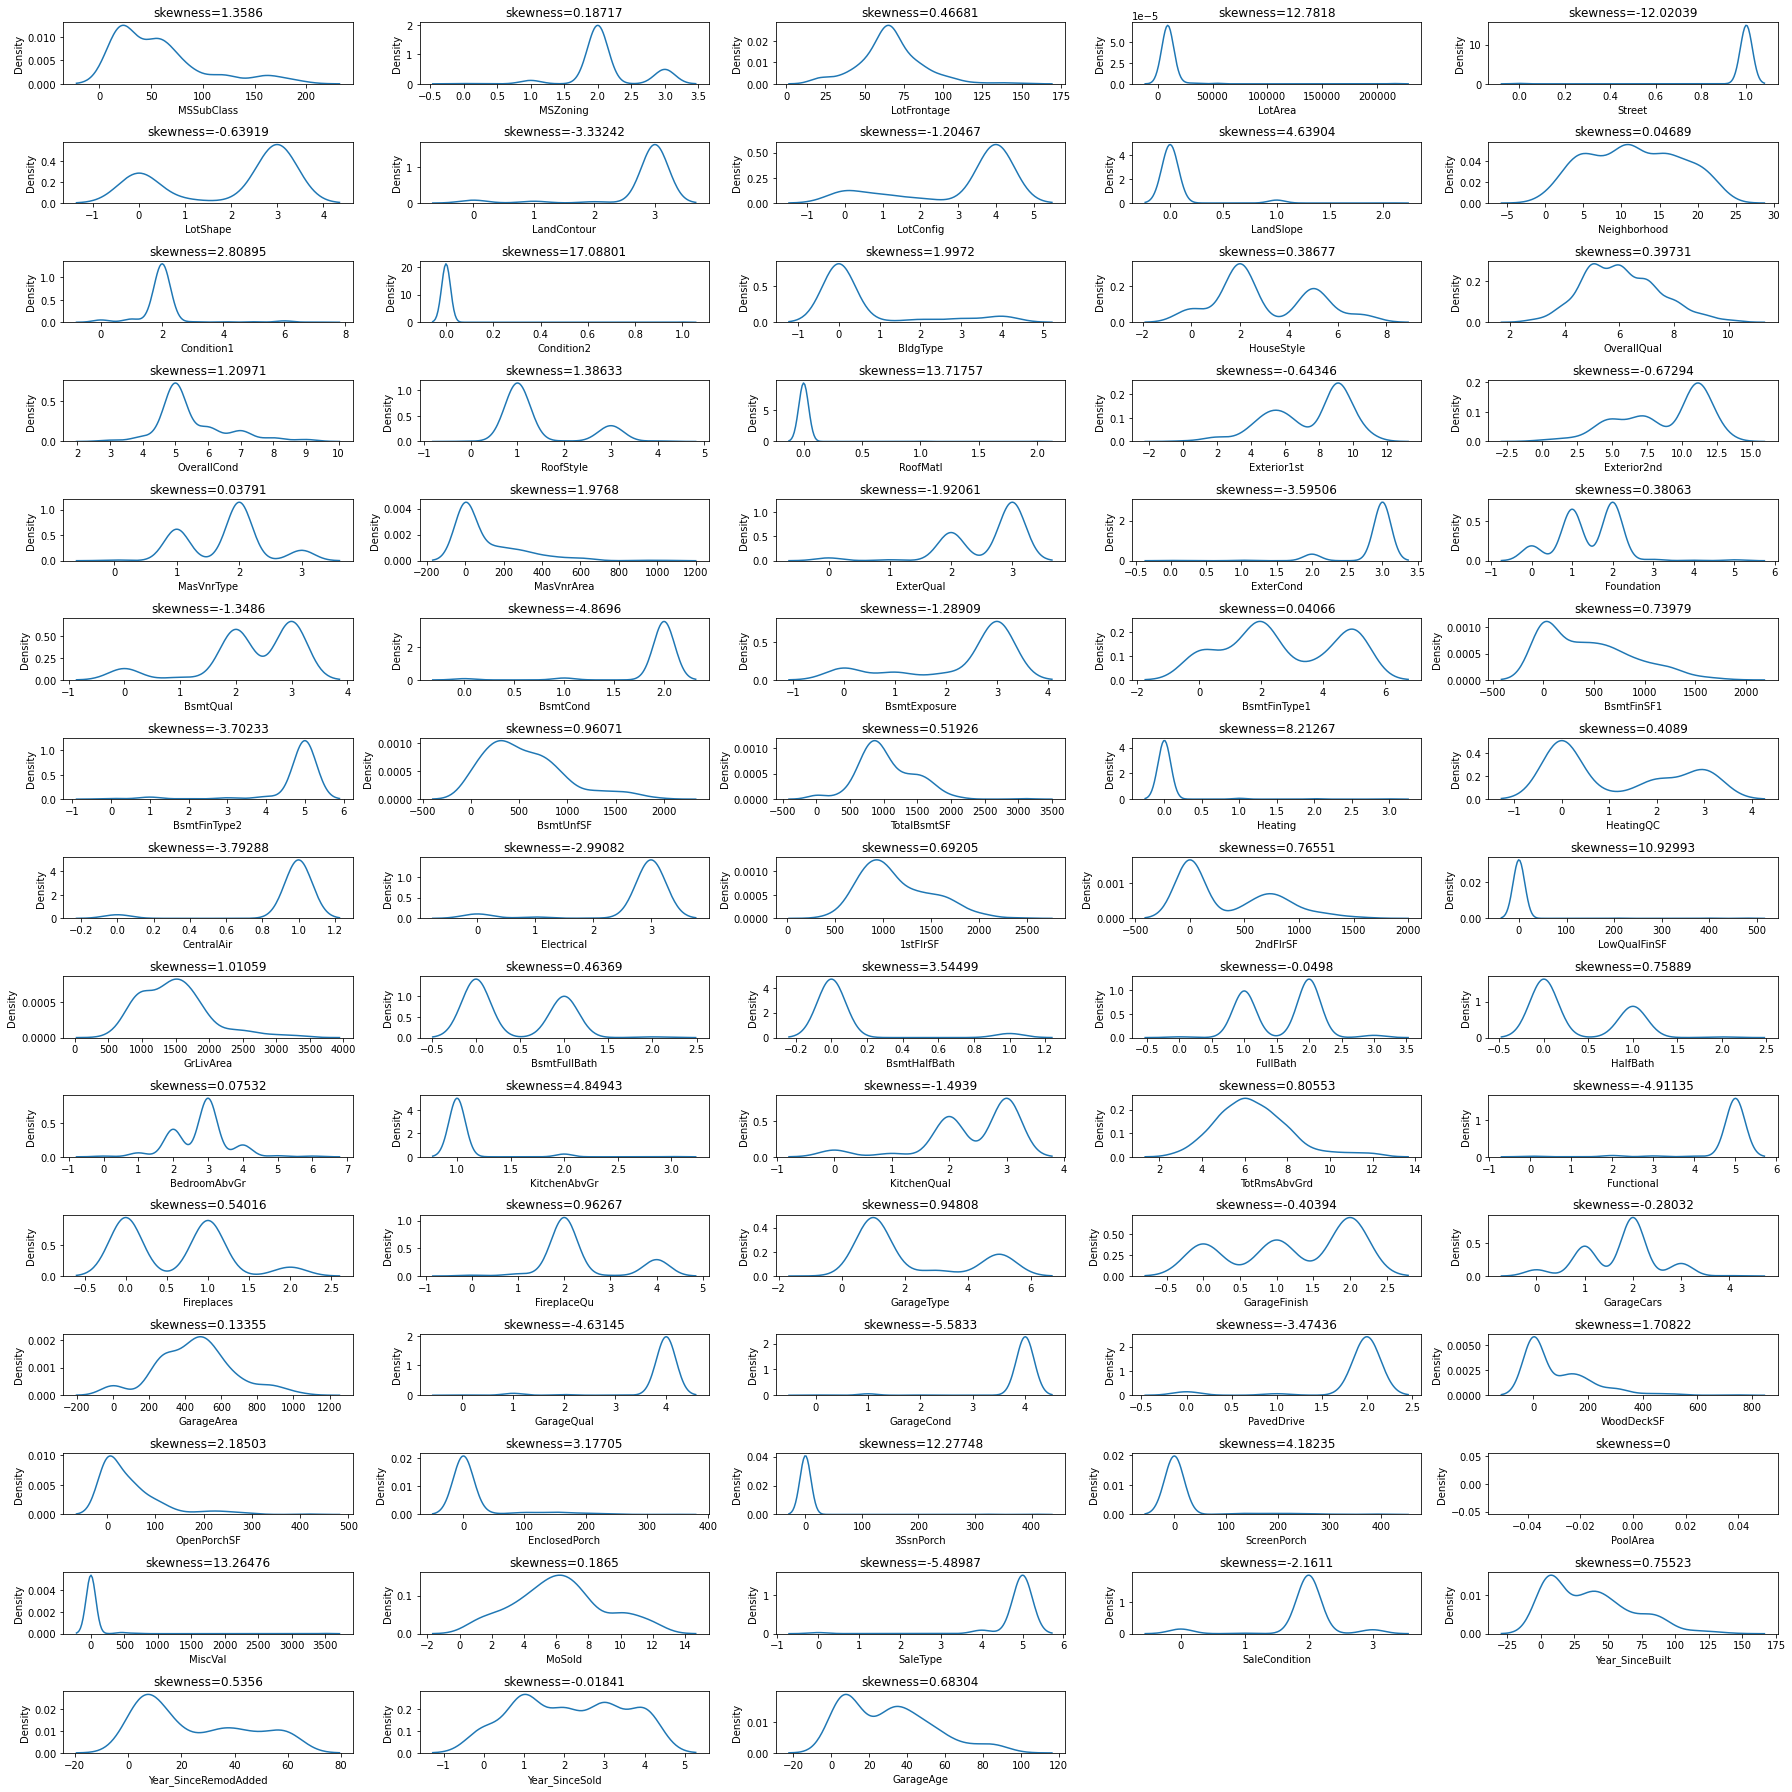

In [95]:
collist = df1.columns.values
plt.figure(figsize=(25,25))

for i in range(0,len(collist)):
    plt.subplot(15,5,i+1)
    sns.kdeplot(df1[collist[i]])
    plt.title(f"skewness={round(df1[collist[i]].skew(),5)}")
    plt.tight_layout()

keeping +/-0.5 as skew value we can observe many columns have skewness. This can be removed by power transform method.

In [96]:
from sklearn.preprocessing import power_transform
x1_new = power_transform(df1,method='yeo-johnson')

In [97]:
x1 = pd.DataFrame((x1_new),columns=df1.columns)

# Standard Scaler:

In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1 = pd.DataFrame(sc.fit_transform(x1),columns=x1.columns)

# Multicolinearity:

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])]
vif['Features'] = X1.columns
vif

VIF              Features
0   10.067266            MSSubClass
1    1.921882              MSZoning
2    2.806536           LotFrontage
3    4.526546               LotArea
4    1.741307                Street
5    1.732138              LotShape
6    1.981961           LandContour
7    1.425202             LotConfig
8    2.536433             LandSlope
9    1.643207          Neighborhood
10   1.491919            Condition1
11   1.604845            Condition2
12   8.103909              BldgType
13   3.398833            HouseStyle
14   5.122133           OverallQual
15   3.234748           OverallCond
16   1.667455             RoofStyle
17   1.524732              RoofMatl
18   6.541991           Exterior1st
19   7.034247           Exterior2nd
20   2.419972            MasVnrType
21   2.763300            MasVnrArea
22   4.685146             ExterQual
23   1.632979             ExterCond
24   3.297591            Foundation
25   3.365738              BsmtQual
26   1.318169              BsmtCond
27   2.202323          BsmtExposure
28   3.476648          BsmtFinType1
29   9.316265            BsmtFinSF1
30   1.891598          BsmtFinType2
31   8.344458             BsmtUnfSF
32  13.645017           TotalBsmtSF
33   2.498319               Heating
34   2.157827             HeatingQC
35   3.578154            CentralAir
36   2.271404            Electrical
37  35.409113              1stFlrSF
38  40.443143              2ndFlrSF
39   2.035211          LowQualFinSF
40  58.599384             GrLivArea
41   2.804237          BsmtFullBath
42   1.480877          BsmtHalfBath
43   4.154448              FullBath
44   3.415837              HalfBath
45   3.349242          BedroomAbvGr
46   3.183009          KitchenAbvGr
47   3.120662           KitchenQual
48   6.154744          TotRmsAbvGrd
49   1.926306            Functional
50   2.785499            Fireplaces
51   1.739546           FireplaceQu
52   2.004564            GarageType
53   2.473975          GarageFinish
54  10.699332            GarageCars
55   8.249380            GarageArea
56   2.118590            GarageQual
57   2.091017            GarageCond
58   2.049712            PavedDrive
59   1.754813            WoodDeckSF
60   1.685281           OpenPorchSF
61   2.047236         EnclosedPorch
62   1.307613             3SsnPorch
63   1.523027           ScreenPorch
64        NaN              PoolArea
65   1.483375               MiscVal
66   1.390608                MoSold
67   1.712875              SaleType
68   1.816701         SaleCondition
69  17.290945       Year_SinceBuilt
70   4.743447  Year_SinceRemodAdded
71   1.340319        Year_SinceSold
72   7.992327             GarageAge

'GrLivArea' has high vif value which can be removed

In [100]:
X1 = X1.drop(['GrLivArea'],axis=1)

In [101]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])]
vif['Features'] = X1.columns
vif

VIF              Features
0    9.434276            MSSubClass
1    1.921879              MSZoning
2    2.804449           LotFrontage
3    4.501338               LotArea
4    1.716503                Street
5    1.730452              LotShape
6    1.978970           LandContour
7    1.425114             LotConfig
8    2.522982             LandSlope
9    1.639422          Neighborhood
10   1.489316            Condition1
11   1.591194            Condition2
12   7.686873              BldgType
13   2.765329            HouseStyle
14   5.054239           OverallQual
15   3.234576           OverallCond
16   1.659145             RoofStyle
17   1.523839              RoofMatl
18   6.522594           Exterior1st
19   6.940035           Exterior2nd
20   2.415945            MasVnrType
21   2.763192            MasVnrArea
22   4.560048             ExterQual
23   1.632893             ExterCond
24   3.260549            Foundation
25   3.363216              BsmtQual
26   1.313242              BsmtCond
27   2.201718          BsmtExposure
28   3.468614          BsmtFinType1
29   9.307645            BsmtFinSF1
30   1.888570          BsmtFinType2
31   8.293087             BsmtUnfSF
32  13.372572           TotalBsmtSF
33   2.498312               Heating
34   2.156612             HeatingQC
35   3.571190            CentralAir
36   2.270704            Electrical
37   9.105444              1stFlrSF
38   9.876533              2ndFlrSF
39   1.766867          LowQualFinSF
40   2.783495          BsmtFullBath
41   1.474982          BsmtHalfBath
42   4.043056              FullBath
43   3.235042              HalfBath
44   3.254330          BedroomAbvGr
45   3.135823          KitchenAbvGr
46   3.120661           KitchenQual
47   6.112401          TotRmsAbvGrd
48   1.898369            Functional
49   2.727045            Fireplaces
50   1.738258           FireplaceQu
51   2.003929            GarageType
52   2.466559          GarageFinish
53  10.699274            GarageCars
54   8.227482            GarageArea
55   2.077089            GarageQual
56   2.077595            GarageCond
57   2.046024            PavedDrive
58   1.753798            WoodDeckSF
59   1.683502           OpenPorchSF
60   2.009797         EnclosedPorch
61   1.306126             3SsnPorch
62   1.519761           ScreenPorch
63        NaN              PoolArea
64   1.473632               MiscVal
65   1.381417                MoSold
66   1.700648              SaleType
67   1.813585         SaleCondition
68  17.211109       Year_SinceBuilt
69   4.741743  Year_SinceRemodAdded
70   1.339893        Year_SinceSold
71   7.970007             GarageAge

'Year_SinceBuilt' has high vif value which can be removed

In [102]:
X1 = X1.drop(['Year_SinceBuilt'],axis=1)

In [103]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])]
vif['Features'] = X1.columns
vif

VIF              Features
0    9.404243            MSSubClass
1    1.896351              MSZoning
2    2.748848           LotFrontage
3    4.499619               LotArea
4    1.716423                Street
5    1.721436              LotShape
6    1.975434           LandContour
7    1.423926             LotConfig
8    2.501742             LandSlope
9    1.631423          Neighborhood
10   1.481999            Condition1
11   1.584153            Condition2
12   7.513612              BldgType
13   2.710611            HouseStyle
14   5.022923           OverallQual
15   2.809008           OverallCond
16   1.657525             RoofStyle
17   1.522675              RoofMatl
18   6.261229           Exterior1st
19   6.588331           Exterior2nd
20   2.397215            MasVnrType
21   2.759127            MasVnrArea
22   4.556135             ExterQual
23   1.540611             ExterCond
24   3.020764            Foundation
25   3.357429              BsmtQual
26   1.298519              BsmtCond
27   2.199496          BsmtExposure
28   3.468406          BsmtFinType1
29   9.302607            BsmtFinSF1
30   1.885246          BsmtFinType2
31   8.269661             BsmtUnfSF
32  13.313747           TotalBsmtSF
33   2.498042               Heating
34   2.156603             HeatingQC
35   3.360321            CentralAir
36   2.253357            Electrical
37   9.072439              1stFlrSF
38   9.864705              2ndFlrSF
39   1.631736          LowQualFinSF
40   2.769404          BsmtFullBath
41   1.473169          BsmtHalfBath
42   3.967985              FullBath
43   3.234591              HalfBath
44   3.252756          BedroomAbvGr
45   3.044212          KitchenAbvGr
46   3.009630           KitchenQual
47   6.092983          TotRmsAbvGrd
48   1.824628            Functional
49   2.724329            Fireplaces
50   1.725101           FireplaceQu
51   1.988462            GarageType
52   2.463243          GarageFinish
53  10.416563            GarageCars
54   8.170074            GarageArea
55   2.076503            GarageQual
56   2.076787            GarageCond
57   1.933054            PavedDrive
58   1.739768            WoodDeckSF
59   1.652412           OpenPorchSF
60   1.934302         EnclosedPorch
61   1.296452             3SsnPorch
62   1.514415           ScreenPorch
63        NaN              PoolArea
64   1.472434               MiscVal
65   1.362097                MoSold
66   1.694668              SaleType
67   1.786785         SaleCondition
68   4.408884  Year_SinceRemodAdded
69   1.326103        Year_SinceSold
70   6.115134             GarageAge

'TotalBsmtSF' has high vif value which can be dropped

In [104]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])]
vif['Features'] = X1.columns
vif

VIF              Features
0    9.404243            MSSubClass
1    1.896351              MSZoning
2    2.748848           LotFrontage
3    4.499619               LotArea
4    1.716423                Street
5    1.721436              LotShape
6    1.975434           LandContour
7    1.423926             LotConfig
8    2.501742             LandSlope
9    1.631423          Neighborhood
10   1.481999            Condition1
11   1.584153            Condition2
12   7.513612              BldgType
13   2.710611            HouseStyle
14   5.022923           OverallQual
15   2.809008           OverallCond
16   1.657525             RoofStyle
17   1.522675              RoofMatl
18   6.261229           Exterior1st
19   6.588331           Exterior2nd
20   2.397215            MasVnrType
21   2.759127            MasVnrArea
22   4.556135             ExterQual
23   1.540611             ExterCond
24   3.020764            Foundation
25   3.357429              BsmtQual
26   1.298519              BsmtCond
27   2.199496          BsmtExposure
28   3.468406          BsmtFinType1
29   9.302607            BsmtFinSF1
30   1.885246          BsmtFinType2
31   8.269661             BsmtUnfSF
32  13.313747           TotalBsmtSF
33   2.498042               Heating
34   2.156603             HeatingQC
35   3.360321            CentralAir
36   2.253357            Electrical
37   9.072439              1stFlrSF
38   9.864705              2ndFlrSF
39   1.631736          LowQualFinSF
40   2.769404          BsmtFullBath
41   1.473169          BsmtHalfBath
42   3.967985              FullBath
43   3.234591              HalfBath
44   3.252756          BedroomAbvGr
45   3.044212          KitchenAbvGr
46   3.009630           KitchenQual
47   6.092983          TotRmsAbvGrd
48   1.824628            Functional
49   2.724329            Fireplaces
50   1.725101           FireplaceQu
51   1.988462            GarageType
52   2.463243          GarageFinish
53  10.416563            GarageCars
54   8.170074            GarageArea
55   2.076503            GarageQual
56   2.076787            GarageCond
57   1.933054            PavedDrive
58   1.739768            WoodDeckSF
59   1.652412           OpenPorchSF
60   1.934302         EnclosedPorch
61   1.296452             3SsnPorch
62   1.514415           ScreenPorch
63        NaN              PoolArea
64   1.472434               MiscVal
65   1.362097                MoSold
66   1.694668              SaleType
67   1.786785         SaleCondition
68   4.408884  Year_SinceRemodAdded
69   1.326103        Year_SinceSold
70   6.115134             GarageAge

Now we have all vif values less than 10 and no need to drop any columns further

In [105]:
X.shape

(1168, 71)

In [106]:
X1.shape

(292, 71)

In [107]:
Housing_Price = joblib.load('House_Price_Prediction.obj')
prediction = Housing_Price.predict(X)
prediction

array([138095.90627307, 296841.19993381, 236309.91801696, ...,
       145690.25617299,  59614.39952744, 178688.63198316])

In [108]:
Housing_Price_Prediction = pd.DataFrame()
Housing_Price_Prediction["House_Price"] = prediction
Housing_Price_Prediction.head(20)

House_Price
0   138095.906273
1   296841.199934
2   236309.918017
3   188069.019082
4   220715.314674
5   223637.209491
6   148399.550851
7   147230.974812
8   141195.671162
9   113659.618648
10  124123.355553
11  219663.451946
12  209765.456054
13  123335.720938
14  133751.831484
15  152835.264620
16  129605.327860
17  192694.415193
18  165187.198970
19  109868.015108

In [109]:
Housing_Price_Prediction.to_csv("Housing_Price_Prediction.csv")